<b> NAMA KELOMPOK - LEVAMTA :

    1. Agis Fauzi Rachman
    2. Ahmad Mirza
    3. Hendri Angkasa
    4. Karina Kristanti
    5. Lina Utami Ningsih
    6. Raisya Ayu Widiyanti

**Dataset : [Ecommerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

---

# <b> 1. LOAD DATASET

## <i> A. Import Library

In [1]:
import pandas as pd

## <i> B. Menampilkan Dataset

In [2]:
df = pd.read_csv('Train.csv') #dataset berasal dari kaggle yang tertera diatas
df.sample(3) #hanya mengambil 3 baris contoh dari dataset, untuk melihat isi dari setiap kolom.

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
4889  4890               F             Ship                    5   
7432  7433               C             Ship                    5   
1283  1284               F             Ship                    4   

      Customer_rating  Cost_of_the_Product  Prior_purchases  \
4889                5                  232                3   
7432                2                  254                2   
1283                1                  267                3   

     Product_importance Gender  Discount_offered  Weight_in_gms  \
4889                low      F                 2           4545   
7432                low      F                 5           4985   
1283             medium      M                37           2716   

      Reached.on.Time_Y.N  
4889                    1  
7432                    1  
1283                    1

*Data Description*<br>

**ID**: ID Number of Customers.<br>
**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.<br>
**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.<br>
**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
**Cost of the product**: Cost of the Product in US Dollars.<br>
**Prior purchases**: The Number of Prior Purchase.<br>
**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.<br>
**Gender**: Male and Female.<br>
**Discount offered**: Discount offered on that specific product.<br>
**Weight in gms**: It is the weight in grams.<br>
**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## <i> C. Mengubah Nama Kolom

In [3]:
df = df.rename(columns={'Reached.on.Time_Y.N':'Late_Y.N'})

Berdasarkan dataset tersebut kolom *Reached on time* diubah menjadi *Late*,<br>
karena isi dari kolom tersebut memiliki arti 1 = tidak tepat waktu dan 0 = tepat waktu.<br>
Sedangkan dalam jupyter 1 artinya benar dan 0 artinya salah, maka dari itu agar tidak salah arti/makna dilakukan perubahan nama kolom yang sesuai.

# <b> 2. DESCRIPTIVE STATISTICS

## <i> A. Menampilkan Informasi dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Late_Y.N             10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


<mark>Dataset Ecommerce memiliki 10.999 baris dengan 12 kolom.

## <I> B. Menampilakan data kosong (null)

In [5]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Late_Y.N               0
dtype: int64

<mark> Dataset juga tidak memiliki nilai kosong / null.

## <I> C. Menampilkan data duplikat

In [6]:
df.duplicated().sum()

0

In [7]:
df['ID'].duplicated().any()

False

<mark> Dataset yang tersedia juga tidak memiliki nilai/data yang duplikat.

## <I> D . Measure of Central Tendency (Ukuran Pemusatan)

### 1) Fungsi value count

In [8]:
#menghitung total value/nilai setiap kategori masing-masing kolom
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('___'*20, '\n')
    print()

Value count kolom ID:
1        1
7337     1
7329     1
7330     1
7331     1
        ..
3669     1
3670     1
3671     1
3672     1
10999    1
Name: ID, Length: 10999, dtype: int64
____________________________________________________________ 


Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
____________________________________________________________ 


Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
____________________________________________________________ 


Value count kolom Customer_care_calls:
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
____________________________________________________________ 


Value count kolom Customer_rating:
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
____________________________________________________________ 




Fokus utama pada kolom(**Late_Y.N**) :
<mark> Dataset memiliki tingkat keterlambatan yang sangat besar sebanyak 6.563 dari 10.999 (lebih dari 50%)

### 2) Memisahkan kolom numerical dan categorical

In [9]:
num = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases' ,'Discount_offered', 'Weight_in_gms']
cat = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Late_Y.N']

Untuk type numerical berdasarkan feature yang nilainya dapat diukur <br>
sedangkan data categorical berdasarkan variabel yang dapat dikelompokan.

### 3) Fungsi describe

In [10]:
df[num].describe() #Menampilkan nilai statistik untuk data numerical

Customer_care_calls  Cost_of_the_Product  Prior_purchases  \
count         10999.000000         10999.000000     10999.000000   
mean              4.054459           210.196836         3.567597   
std               1.141490            48.063272         1.522860   
min               2.000000            96.000000         2.000000   
25%               3.000000           169.000000         3.000000   
50%               4.000000           214.000000         3.000000   
75%               5.000000           251.000000         4.000000   
max               7.000000           310.000000        10.000000   

       Discount_offered  Weight_in_gms  
count      10999.000000   10999.000000  
mean          13.373216    3634.016729  
std           16.205527    1635.377251  
min            1.000000    1001.000000  
25%            4.000000    1839.500000  
50%            7.000000    4149.000000  
75%           10.000000    5050.000000  
max           65.000000    7846.000000

<mark> Hanya nilai **prior_purchases** dan **discount_offerd** yang memiliki jarak yang jauh, <br>
    jika dilihat antara rata-rata (mean) dengan nilai tertinggi (max).

In [11]:
df[cat] = df[cat].astype('object') #mengubah setiap kolom menjadi object/string
df[cat].describe() #Menampilkan nilai statistik untuk data categorical

ID Warehouse_block Mode_of_Shipment  Customer_rating  \
count   10999           10999            10999            10999   
unique  10999               5                3                5   
top         1               F             Ship                3   
freq        1            3666             7462             2239   

       Product_importance Gender  Late_Y.N  
count               10999  10999     10999  
unique                  3      2         2  
top                   low      F         1  
freq                 5297   5545      6563

<mark> Berdasarkan hasil di atas, menunjukan variabel yang memiliki nilai tertinggi berserta jumlah banyaknya.

### 4) Fungsi mean, median, mode, quartile, percentile

#### a) Customer_care_calls

In [12]:
#mean, median, mode
print('mean    :', df['Customer_care_calls'].mean()) 
print('median  :', df['Customer_care_calls'].median())
print('mode    :', df['Customer_care_calls'].mode()[0])

#quartile
print('Q1      :', df['Customer_care_calls'].quantile(0.25))
print('Q3      :', df['Customer_care_calls'].quantile(0.75))

#percentile
print('P95     :', df['Customer_care_calls'].quantile(0.95))
print('P99     :', df['Customer_care_calls'].quantile(0.99))

mean    : 4.054459496317847
median  : 4.0
mode    : 4
Q1      : 3.0
Q3      : 5.0
P95     : 6.0
P99     : 7.0


Berdasarkan Quartile (Q1, Q3) dapat disimpulkan:<br>
<mark> <u>Kebanyakan</u> pelanggan sudah merasa cukup untuk telepon call center sebanyak <b>3-5x</b>.

#### b) Customer_rating

In [13]:
#mean, median, mode
print('mean    :', df['Customer_rating'].mean()) 
print('median  :', df['Customer_rating'].median())
print('mode    :', df['Customer_rating'].mode()[0])

#quartile
print('Q1      :', df['Customer_rating'].quantile(0.25))
print('Q3      :', df['Customer_rating'].quantile(0.75))

#percentile
print('P95     :', df['Customer_rating'].quantile(0.95))
print('P99     :', df['Customer_rating'].quantile(0.99))

mean    : 2.9905445949631786
median  : 3.0
mode    : 3
Q1      : 2.0
Q3      : 4.0
P95     : 5.0
P99     : 5.0


<mark> Banyak pelanggan memberikan rating atas pelayanan sebesar 3 dari 5.

#### c) Cost_of_the_Product

In [14]:
#mean, median, mode
print('mean    :', df['Cost_of_the_Product'].mean()) 
print('median  :', df['Cost_of_the_Product'].median())
print('mode    :', df['Cost_of_the_Product'].mode()[0])

#quartile
print('Q1      :', df['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df['Cost_of_the_Product'].quantile(0.99))

mean    : 210.19683607600692
median  : 214.0
mode    : 245
Q1      : 169.0
Q3      : 251.0
P95     : 279.0
P99     : 304.0


<mark> Berdasarkan data harga produk tersebut dapat dikelompokan menjadi : </mark><br>
Murah   : < 170<br>
Standar : 170 - 251<br>
Mahal   : > 251<br>

#### d) Prior_purchases

In [15]:
#mean, median, mode
print('mean    :', df['Prior_purchases'].mean()) 
print('median  :', df['Prior_purchases'].median())
print('mode    :', df['Prior_purchases'].mode()[0])

#quartile
print('Q1      :', df['Prior_purchases'].quantile(0.25))
print('Q3      :', df['Prior_purchases'].quantile(0.75))

#percentile
print('P95     :', df['Prior_purchases'].quantile(0.95))
print('P99     :', df['Prior_purchases'].quantile(0.99))

mean    : 3.5675970542776616
median  : 3.0
mode    : 3
Q1      : 3.0
Q3      : 4.0
P95     : 6.0
P99     : 10.0


<mark> Berdasarkan data pembelian sebelumnya tersebut dapat dikelompokan menjadi : </mark><br>
Silver   : < 4<br>
Gold     : 4-6<br>
Platinum : > 6<br>

#### e) Discount_offered

In [16]:
#mean, median, mode
print('mean    :', df['Discount_offered'].mean()) 
print('median  :', df['Discount_offered'].median())
print('mode    :', df['Discount_offered'].mode()[0])

#quartile
print('Q1      :', df['Discount_offered'].quantile(0.25))
print('Q3      :', df['Discount_offered'].quantile(0.75))

#percentile
print('P95     :', df['Discount_offered'].quantile(0.95))
print('P99     :', df['Discount_offered'].quantile(0.99))

mean    : 13.37321574688608
median  : 7.0
mode    : 10
Q1      : 4.0
Q3      : 10.0
P95     : 54.0
P99     : 63.0


<mark> Kebanyakan diskon yang diberikan adalah 10%

#### f) Weight_in_gms

In [17]:
#mean, median, mode
print('mean    :', df['Weight_in_gms'].mean()) 
print('median  :', df['Weight_in_gms'].median())
print('mode    :', df['Weight_in_gms'].mode()[0])

#quartile
print('Q1      :', df['Weight_in_gms'].quantile(0.25))
print('Q3      :', df['Weight_in_gms'].quantile(0.75))

#percentile
print('P95     :', df['Weight_in_gms'].quantile(0.95))
print('P99     :', df['Weight_in_gms'].quantile(0.99))

mean    : 3634.016728793527
median  : 4149.0
mode    : 4883
Q1      : 1839.5
Q3      : 5050.0
P95     : 5807.0
P99     : 5964.02


<mark> Berat produk yang paling banyak dibeli oleh pelanggan 4kg-5kg

#### g) Customer_rating vs Customer_care_calls

In [18]:
#mean, median, mode
print('mean    :', df.groupby(['Customer_rating'])['Customer_care_calls'].mean()) 
print('median  :', df.groupby(['Customer_rating'])['Customer_care_calls'].median())
print('mode    :', df.groupby(['Customer_rating'])['Customer_care_calls'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.25))
print('Q3      :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.95))
print('P99     :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.99))

mean    : Customer_rating
1    4.036242
2    4.048961
3    4.058062
4    4.038831
5    4.090742
Name: Customer_care_calls, dtype: float64
median  : Customer_rating
1    4.0
2    4.0
3    4.0
4    4.0
5    4.0
Name: Customer_care_calls, dtype: float64
mode    : Customer_rating
1    4
2    4
3    4
4    4
5    4
Name: Customer_care_calls, dtype: int64
Q1      : Customer_rating
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
Name: Customer_care_calls, dtype: float64
Q3      : Customer_rating
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
Name: Customer_care_calls, dtype: float64
P95     : Customer_rating
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
Name: Customer_care_calls, dtype: float64
P99     : Customer_rating
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: Customer_care_calls, dtype: float64


<mark> Banyaknya panggilan melalui call center tidak mempengaruhi penilaian customer (rating)

#### h) Customer_rating vs Cost_of_the_Product 

In [19]:
#mean, median, mode
print('mean    :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].mean()) 
print('median  :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].median())
print('mode    :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.99))

mean    : Customer_rating
1    208.979866
2    211.387067
3    209.384547
4    210.132937
5    211.164901
Name: Cost_of_the_Product, dtype: float64
median  : Customer_rating
1    213.0
2    215.0
3    213.0
4    212.0
5    218.0
Name: Cost_of_the_Product, dtype: float64
mode    : Customer_rating
1           258
2           254
3    [245, 257]
4           266
5           268
Name: Cost_of_the_Product, dtype: object
Q1      : Customer_rating
1    169.0
2    172.0
3    168.0
4    172.0
5    168.0
Name: Cost_of_the_Product, dtype: float64
Q3      : Customer_rating
1    250.0
2    252.0
3    249.5
4    251.0
5    253.0
Name: Cost_of_the_Product, dtype: float64
P95     : Customer_rating
1    276.0
2    279.0
3    277.1
4    280.0
5    281.0
Name: Cost_of_the_Product, dtype: float64
P99     : Customer_rating
1    303.00
2    304.00
3    305.62
4    300.12
5    302.00
Name: Cost_of_the_Product, dtype: float64


<mark> Hasil rating terhadap harga barang pun menunjukan nilai yang sama.

#### i) Prior_purchases vs Cost_of_the_Product

In [20]:
#mean, median, mode
print('mean    :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].mean()) 
print('median  :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].median())
print('mode    :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.99))

mean    : Prior_purchases
2     201.361293
3     200.147914
4     228.989327
5     226.881119
6     217.672014
7     204.955882
8     199.921875
10    202.168539
Name: Cost_of_the_Product, dtype: float64
median  : Prior_purchases
2     202.0
3     199.0
4     245.0
5     239.0
6     230.0
7     206.5
8     204.5
10    201.0
Name: Cost_of_the_Product, dtype: float64
mode    : Prior_purchases
2                 238
3                 192
4                 255
5                 245
6                 262
7     [233, 255, 266]
8                 261
10         [154, 190]
Name: Cost_of_the_Product, dtype: object
Q1      : Prior_purchases
2     165.00
3     162.00
4     186.00
5     207.00
6     185.00
7     169.25
8     154.00
10    162.00
Name: Cost_of_the_Product, dtype: float64
Q3      : Prior_purchases
2     238.00
3     239.00
4     271.00
5     258.00
6     254.00
7     240.00
8     239.25
10    242.00
Name: Cost_of_the_Product, dtype: float64
P95     : Prior_purchases
2     269.0
3     2

jika melihat nilai dari mode/modus maka :
<mark> Kebanyakan pelanggan yang membeli untuk ke 3x seharga 192 USD

#### j) Prior_purchases vs Weight_in_gms

In [21]:
#mean, median
print('mean    :', df.groupby(['Prior_purchases'])['Weight_in_gms'].mean()) 
print('median  :', df.groupby(['Prior_purchases'])['Weight_in_gms'].median())

#quartile
print('Q1      :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.25))
print('Q3      :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.95))
print('P99     :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.99))

mean    : Prior_purchases
2     4018.471720
3     4048.362579
4     3127.137355
5     2445.745144
6     3208.442068
7     4038.691176
8     4153.390625
10    4201.016854
Name: Weight_in_gms, dtype: float64
median  : Prior_purchases
2     4394.0
3     4440.0
4     2551.0
5     1727.0
6     2815.0
7     4367.5
8     4562.5
10    4449.5
Name: Weight_in_gms, dtype: float64
Q1      : Prior_purchases
2     2895.00
3     2936.50
4     1539.50
5     1362.00
6     1616.00
7     2699.50
8     3422.25
10    3411.75
Name: Weight_in_gms, dtype: float64
Q3      : Prior_purchases
2     5192.00
3     5214.00
4     4792.50
5     4016.00
6     4858.00
7     5282.75
8     5148.25
10    5299.25
Name: Weight_in_gms, dtype: float64
P95     : Prior_purchases
2     5840.0
3     5854.6
4     5728.2
5     5563.8
6     5689.0
7     5840.5
8     5752.0
10    5825.4
Name: Weight_in_gms, dtype: float64
P99     : Prior_purchases
2     5961.02
3     5977.46
4     5928.30
5     5888.14
6     5905.80
7     5981.85
8   

<mark> Setiap pembelian berikutnya rata-rata pelanggan membeli dengan berat lebih dari 2 kg.

## <i> E. Measure of Spread (Ukuran Penyebaran)

### 1) Fungsi range, variance, interquartil, Standard Deviation 

#### a) Customer_care_calls

In [22]:
#range, variance, interquartile 
print('Range               :', df['Customer_care_calls'].max() - df['Customer_care_calls'].min())
print('Variance            :', df['Customer_care_calls'].var())
print('Interquartile       :', df['Customer_care_calls'].quantile(0.75) - df['Customer_care_calls'].quantile(0.25))

#std
print('Standard Deviation  :', df['Customer_care_calls'].std())

Range               : 5
Variance            : 1.3029986144485446
Interquartile       : 2.0
Standard Deviation  : 1.1414896471052836


#### b) Customer_rating

In [23]:
#range, variance, interquartile 
print('Range               :', df['Customer_rating'].max() - df['Customer_rating'].min())
print('Variance            :', df['Customer_rating'].var())
print('Interquartile       :', df['Customer_rating'].quantile(0.75) - df['Customer_rating'].quantile(0.25))

#std
print('Standard Deviation  :', df['Customer_rating'].std())

Range               : 4
Variance            : 1.9982739259752837
Interquartile       : 2.0
Standard Deviation  : 1.4136031713232975


#### c) Cost_of_the_Product

In [24]:
#range, variance, interquartile 
print('Range               :', df['Cost_of_the_Product'].max() - df['Cost_of_the_Product'].min())
print('Variance            :', df['Cost_of_the_Product'].var())
print('Interquartile       :', df['Cost_of_the_Product'].quantile(0.75) - df['Cost_of_the_Product'].quantile(0.25))

#std
print('Standard Deviation  :', df['Cost_of_the_Product'].std())

Range               : 214
Variance            : 2310.0780914616676
Interquartile       : 82.0
Standard Deviation  : 48.06327175153256


#### d) Prior_purchases

In [25]:
#range, variance, interquartile 
print('Range               :', df['Prior_purchases'].max() - df['Prior_purchases'].min())
print('Variance            :', df['Prior_purchases'].var())
print('Interquartile       :', df['Prior_purchases'].quantile(0.75) - df['Prior_purchases'].quantile(0.25))

#std
print('Standard Deviation  :', df['Prior_purchases'].std())

Range               : 8
Variance            : 2.3191027086876916
Interquartile       : 1.0
Standard Deviation  : 1.5228600423833083


#### e) Discount_offered

In [26]:
#range, variance, interquartile 
print('Range               :', df['Discount_offered'].max() - df['Discount_offered'].min())
print('Variance            :', df['Discount_offered'].var())
print('Interquartile       :', df['Discount_offered'].quantile(0.75) - df['Discount_offered'].quantile(0.25))

#std
print('Standard Deviation  :', df['Discount_offered'].std())

Range               : 64
Variance            : 262.61910796137164
Interquartile       : 6.0
Standard Deviation  : 16.20552708064047


#### f) Weight_in_gms

In [27]:
#range, variance, interquartile 
print('Range               :', df['Weight_in_gms'].max() - df['Weight_in_gms'].min())
print('Variance            :', df['Weight_in_gms'].var())
print('Interquartile       :', df['Weight_in_gms'].quantile(0.75) - df['Weight_in_gms'].quantile(0.25))

#std
print('Standard Deviation  :', df['Weight_in_gms'].std())

Range               : 6845
Variance            : 2674458.754402788
Interquartile       : 3210.5
Standard Deviation  : 1635.377251401886


## <i> F. Kesimpulan Descriptive Statistics

1. Tingkat keterlambatan cukup besar > 55% (terlambat (6563) : (4436) tepat waktu)
2. Sebanyak 10.999 baris dengan 12 kolom **tidak** memiliki nilai kosong dan duplikat.
3. Outlier hanya terjadi pada kolom **prior_purchases dan discount_offerd**.
4. Panggilan oleh pelanggan yang sering dilakukan sebanyak 3-5x dengan rata-rata rating adalah 3.
5. Mengelompokan pembelian sebelumnya kedalam 3 kategori : Silver untuk pembelian < 4, Gold untuk pembelian 4-6, Platinum untuk pembelian > 6.
6. Mengelompokan harga produk tersebut menjadi 3 kategori : Murah untuk harga < 170 USD, Standar untuk harga 170 - 251 USD, Mahal untuk harga > 251 USD.

# <B> 3. UNIVARIATE ANALYSIS

## <i> A. Import Library

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#mengatur ukuran grafik
from matplotlib import rcParams
rcParams ['figure.figsize'] = (10,7)

## <i> B. Distribusi Kolom Numerical

### 1) Melihat sebaran distribusi

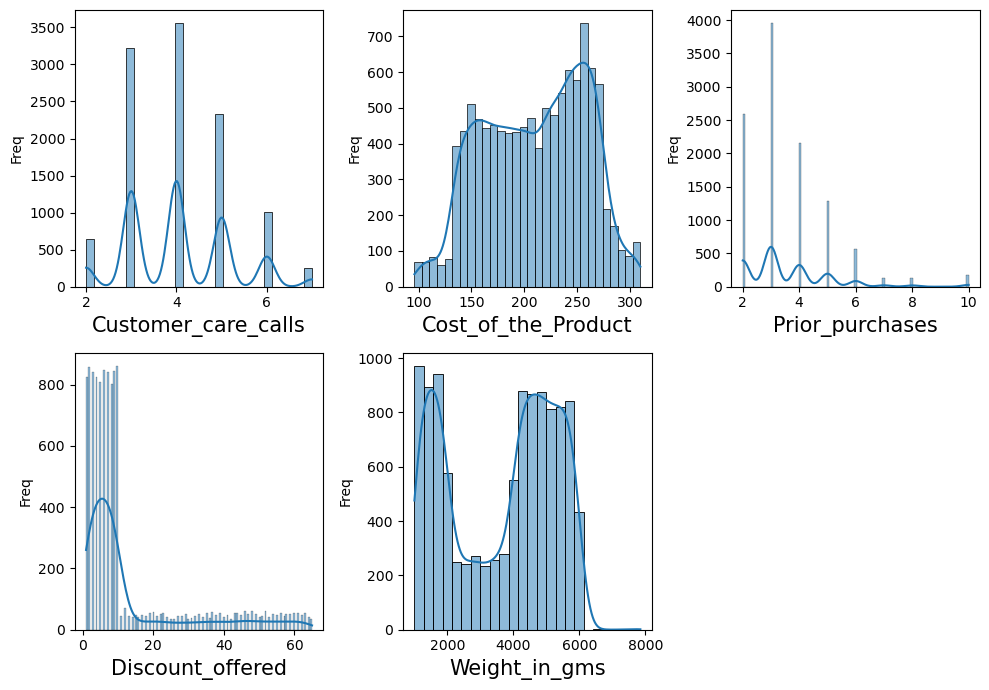

In [29]:
for i in range(len(num)):
    plt.subplot(len(num)//2, 3, i+1)
    ax = sns.histplot(
        x = df[num[i]],
        kde = True
    )
    ax.set_xlabel(num[i], fontsize = 15)
    ax.set_ylabel("Freq", fontsize = 10)
plt.tight_layout()

<mark> Observasi : </mark>
1. **discount_offered dan prior_purchases** memiliki distribusi skew.
2. **weight_in_gms dan cost_of_the_product** memiliki distribusi bimodal.
3. **customer_care_calls** memiliki distribusi normal.

### 2) Melihat boxplot untuk outlier

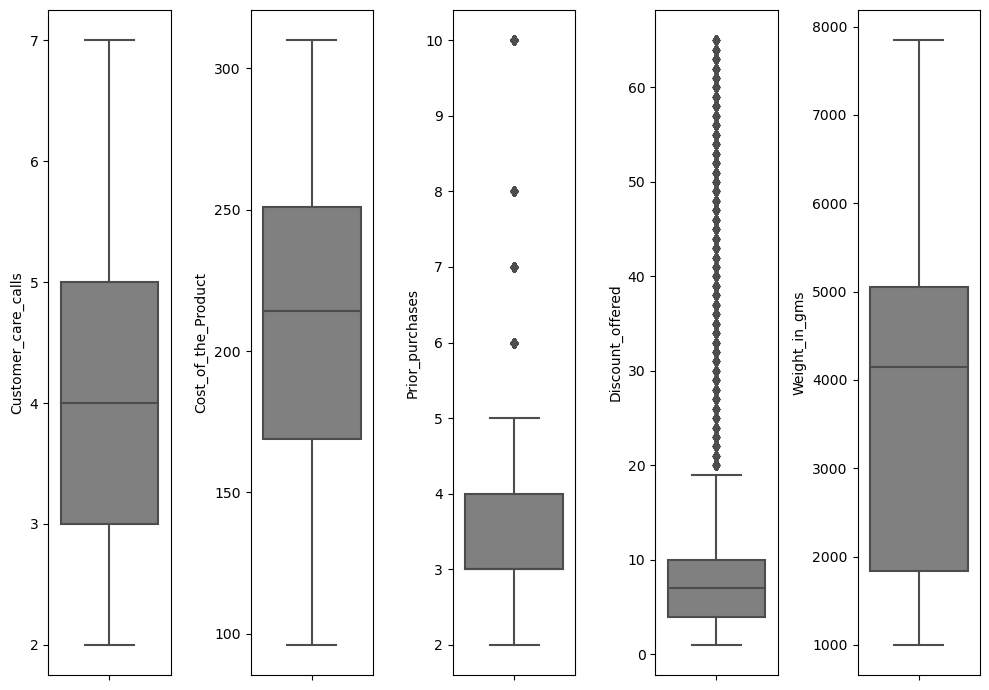

In [30]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='gray', orient='v')
    plt.tight_layout()

<mark> Observasi : </mark><br>
Semua data pada categori numerical memiliki distribusi normal tanpa outlier, kecuali **prior_purchases dan discount_offered**,<br>
hal ini sesuai dengan analisis pada tahapan sebelumnya.

## <i> C. Distribusi Kolom Categorical

### 1) Melihat persebaran kolom categorical

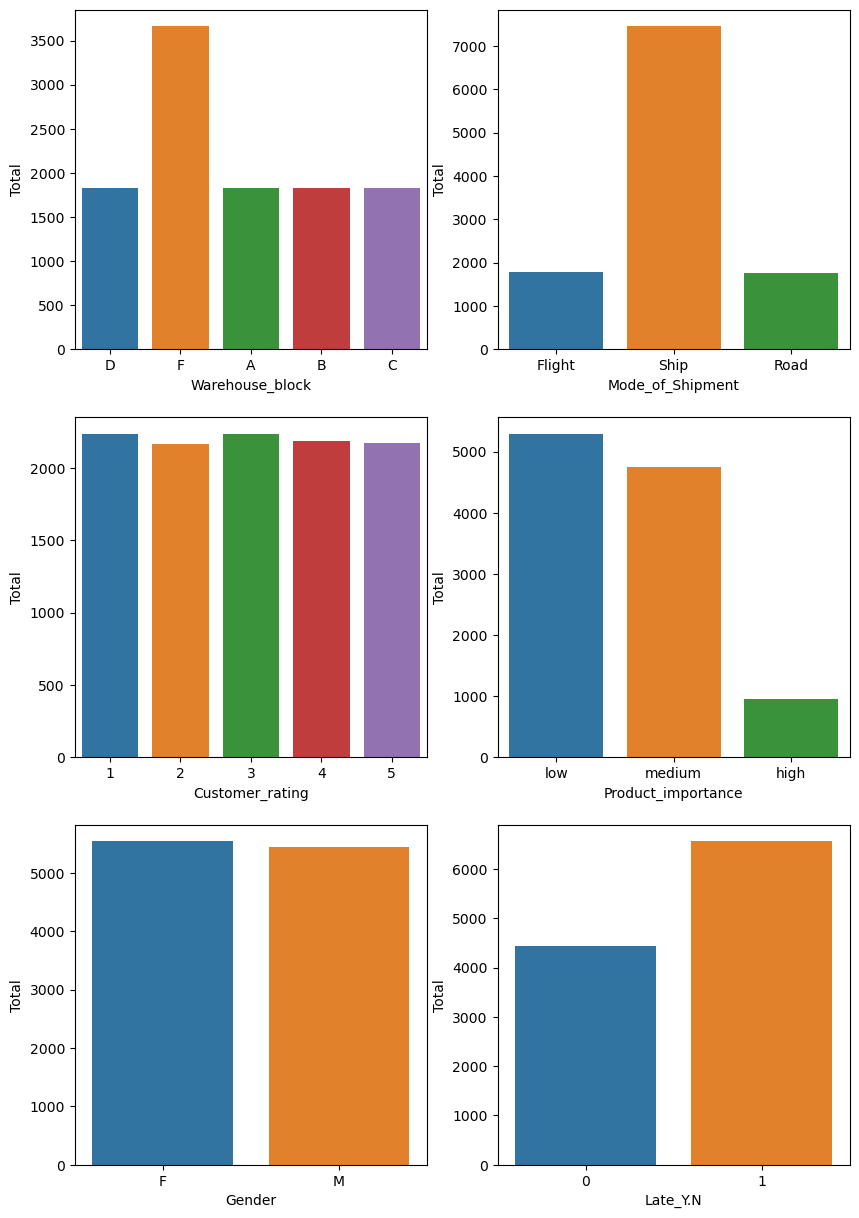

In [31]:
c = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Late_Y.N']
plt.figure(figsize=(10, 15))
for i in range(len(c)):
    plt.subplot(len(c)//2, 2, i+1)
    ax = sns.countplot(
        x = df[c[i]],
    )
    ax.set_xlabel(c[i], fontsize = 10)
    ax.set_ylabel("Total", fontsize = 10)
plt.show()

<mark> Observasi : </mark>
1. Warehouse **F** memiliki tingkat kesibukan paling besar daripada warehouse lainnya.
2. Mode pengiriman jalur laut memiliki tingkat keterpilihan yang besar dibanding mode pengiriman lainnya.
3. Rating hampir tersebar secara merata.
4. Tingkat kepentingan produk yang banyak adalah **low** artinya barang tersebut banyak yang tidak urgent.
5. Perempuan lebih mendominasi ketimbang Laki-laki.
6. Pengiriman belum optimal dibuktikan tingkat keterlambatan yang jauh dari ketepatan waktu.

### 2) Melihat persentase kolom categorical vs target (keterlambatan)

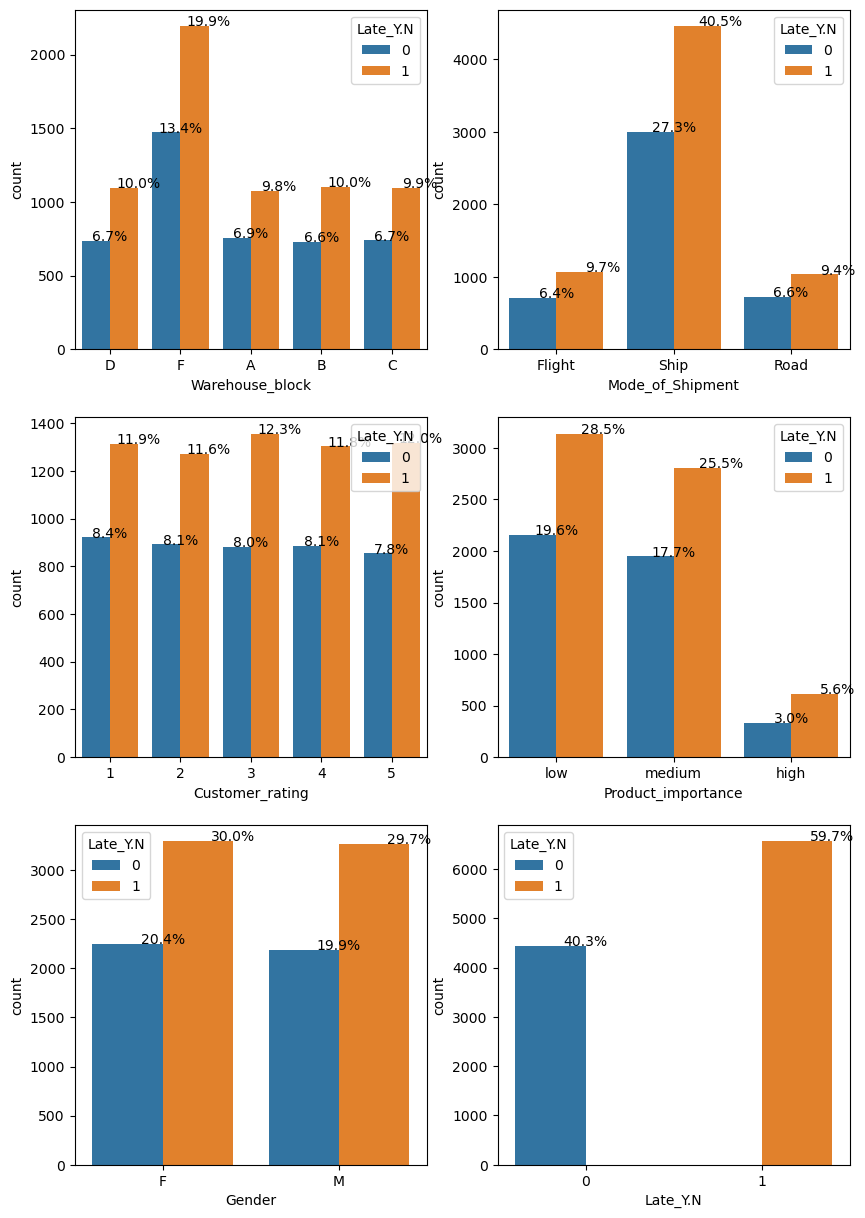

In [32]:
plt.figure(figsize=(10, 15))
for i in range(len(c)):
    plt.subplot(len(c)//2, 2, i+1)
    total = float(len(df))
    ax = sns.countplot(
        x = df[c[i]], data=df, hue='Late_Y.N'
    )
    ax.set_xlabel(c[i], fontsize = 10)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
plt.show()

<mark> Observasi : </mark>
Secara keseluruhan tingkat keterlambatan memiliki persebaran terbanyak terhadap seluruh data categorical.

# <b> 4. MULTIVARIATE ANALYSIS

## <i> A. Korelasi

In [33]:
#Mengubah type data
df['ID'] = df['ID'].astype("int")
df['Customer_rating'] = df['Customer_rating'].astype("int")
df['Late_Y.N'] = df['Late_Y.N'].astype("int")

df.corr()

ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Late_Y.N            -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000         0.123676         -0.138312   
Prior_purchases                 0.123676         1.000000         -0.082769   
Discount_offered               -0.138312        -0.082769          1.000000   
Weight_in_gms                  -0.132604        -0.168213         -0.376067   
Late_Y.N                       -0.073587        -0.055515          0.397108   

                     Weight_in_gms  Late_Y.N  
ID                        0.278312 -0.411822  
Customer_care_calls      -0.276615 -0.067126  
Customer_rating          -0.001897  0.013119  
Cost_of_the_Product      -0.132604 -0.073587  
Prior_purchases          -0.168213 -0.055515  
Discount_offered         -0.376067  0.397108  
Weight_in_gms             1.000000 -0.268793  
Late_Y.N                 -0.268793  1.000000

## <i> B. Heatmap

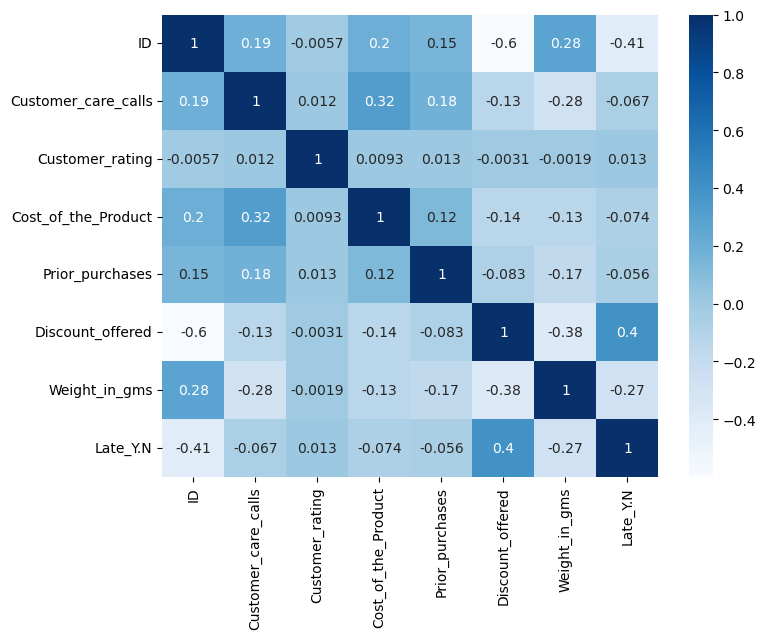

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

<mark> Interpretasi : </mark>
1. Kolom **ID** berkorelasi negatif terhadap target senilai -0.41
2. Kolom **Diskon** berkorelasi postif terhadap target senilai 0.4
3. Kolom **weight** memiliki korelasi negatif terhadap target namun tidak sebesar ID, senilai -0.27
4. **Customer calls** berkorelasi dengan **cost of the produk**, artinya kemungkinan yang telepon memiliki harga yang besar.
5. **ID** berkorelasi dengan **diskon dan berat**, kemungkinan ada penyebaran diskon yang tidak merata terhadap customer.
6. Hal serupa terjadi antara korelasi **diskon dan berat**, kemungkinan pemberian diskon tidak berdasarkan berat produk.

## <I> C. Pair Plots

<Figure size 1500x1500 with 0 Axes>

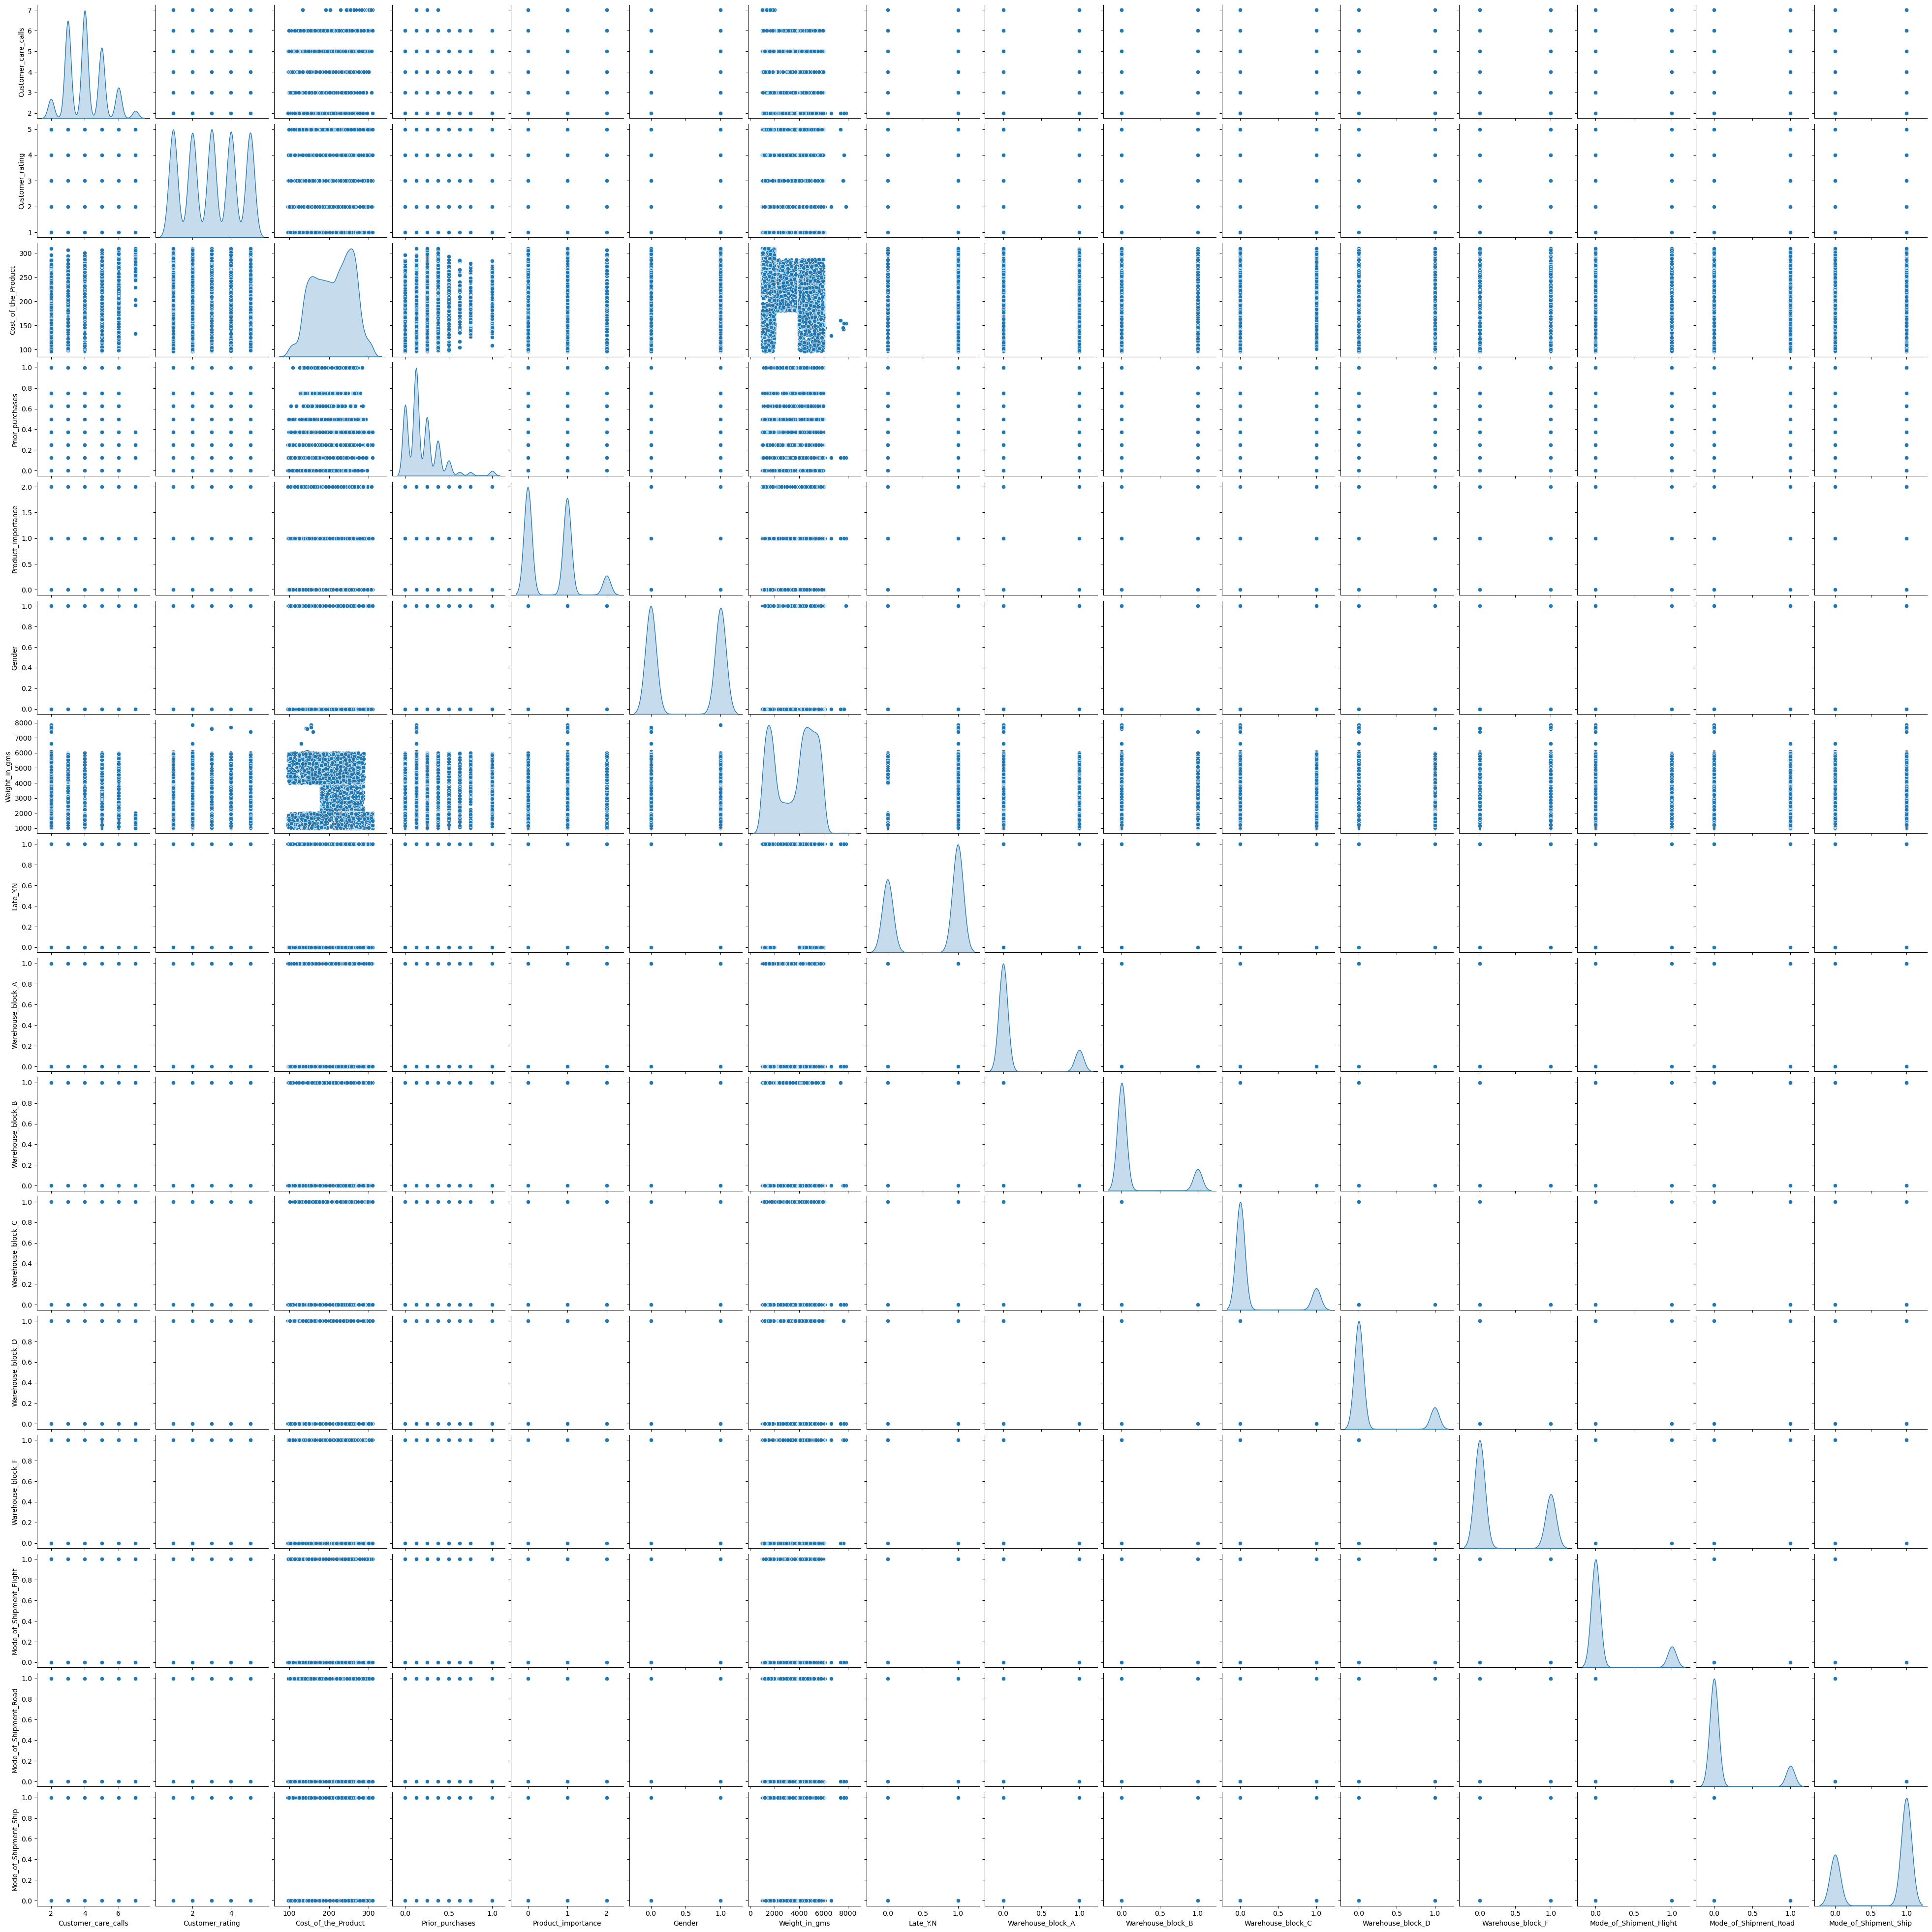

In [82]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

<mark> Ada beberapa cluster/pattern yang jelas yaitu : **ID, Weight,Cost of the product, dan diskon**

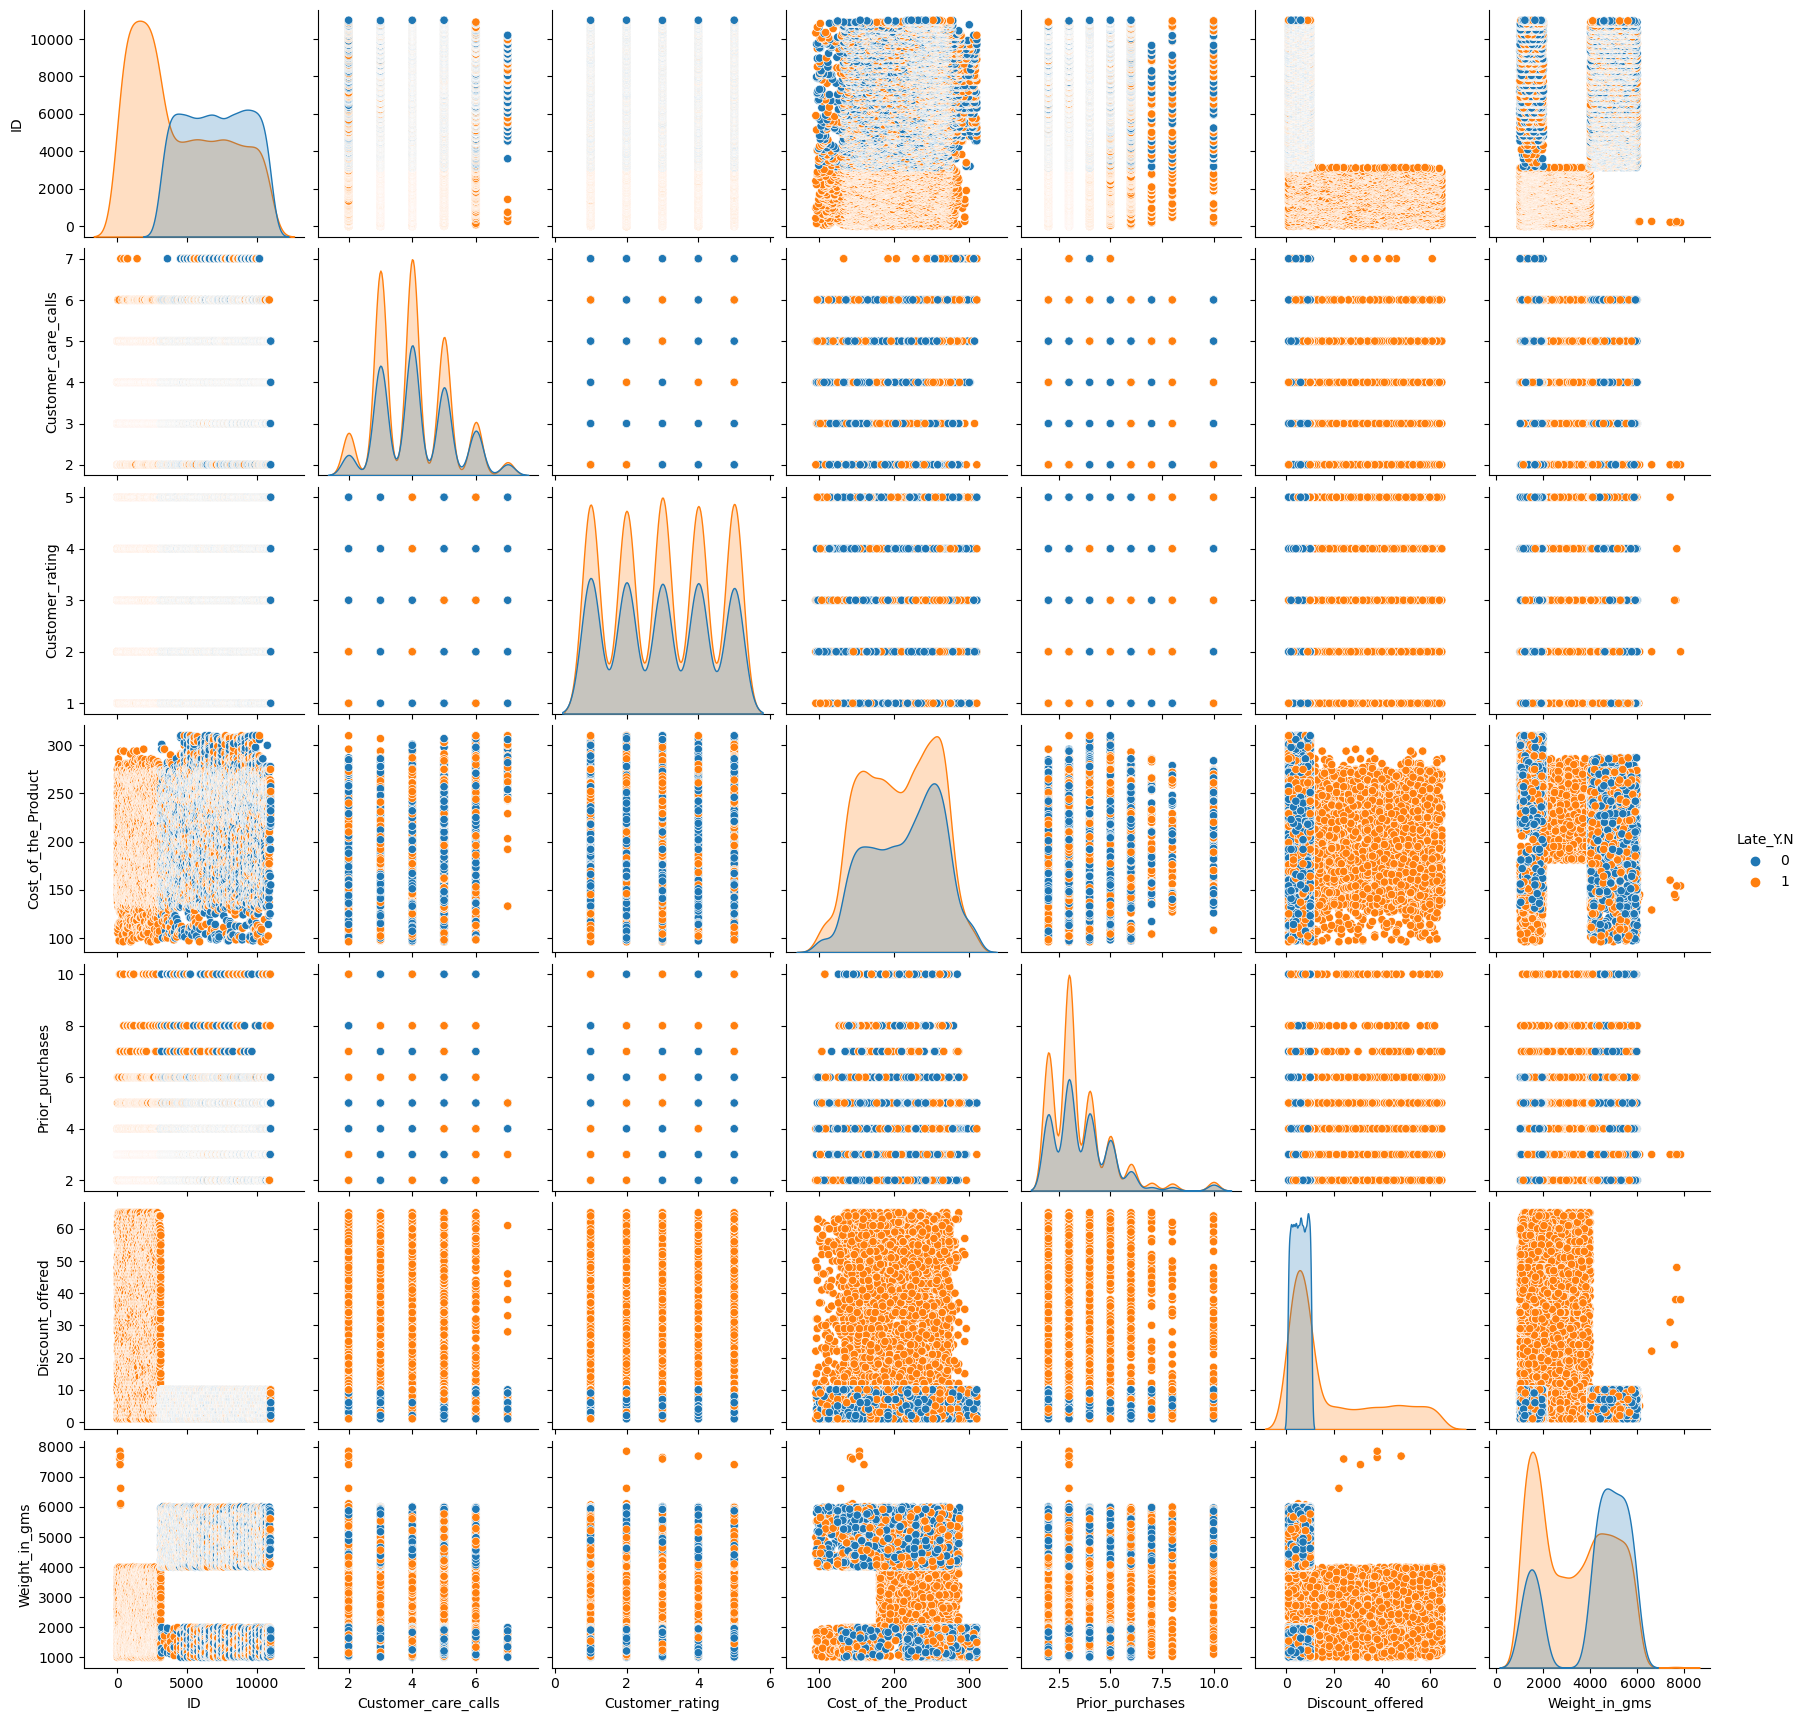

In [36]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Late_Y.N')
plt.show()

<mark> Interpretasi : </mark>
1. Pelanggan awal memiliki keterlambatan yang dominan, dengan harga produk mencapai 300 USD dan diskon yang diberikan lebih dari 10%.
2. Pemberian diskon lebih dari 10% sangat dominan mengalami keterlambatan dan terjadi pada barang dengan berat 2-4kg.
3. Berat produk 1-4kg terbanyak dialami oleh pelanggan awal.
4. Harga produk 175-275 USD sangat dominan mengalami keterlambatan.

In [37]:
cat = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Late_Y.N']

## <i> D. Category Plots

### 1) Melihat data category-numerical vs Target

#### a) Warehouse_block

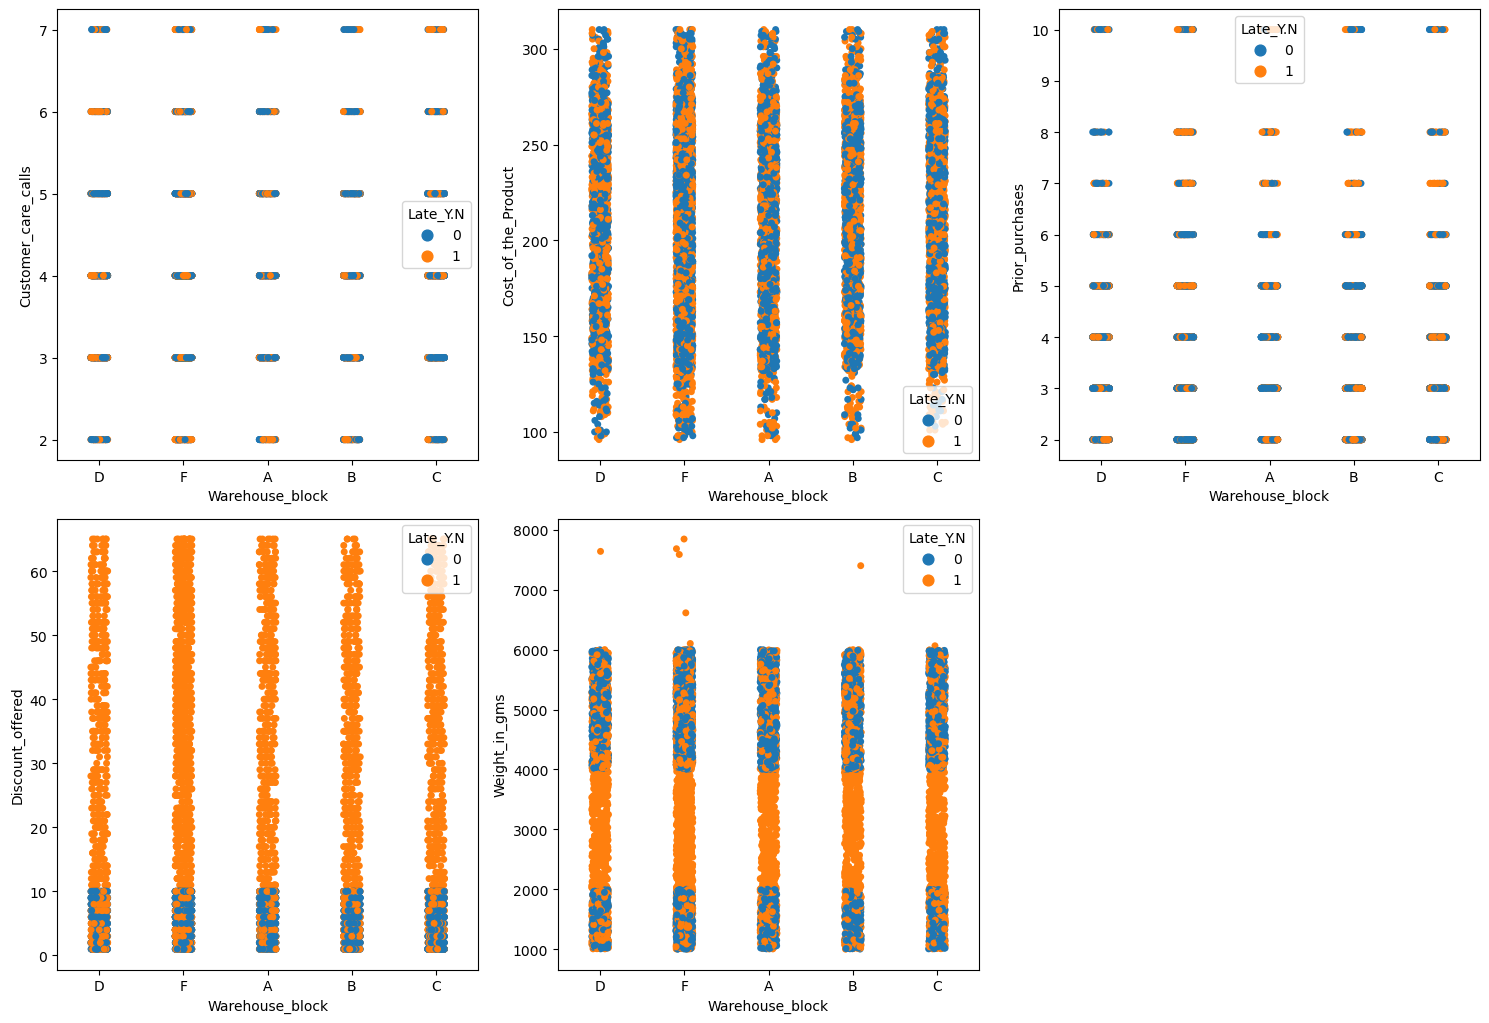

In [38]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Warehouse_block', y=num[i], hue='Late_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

Insight : <mark> Setiap blok warehouse terlambat dengan diskon lebih dari 10% dan berat 2-4kg.

#### b) Mode_of_Shipment

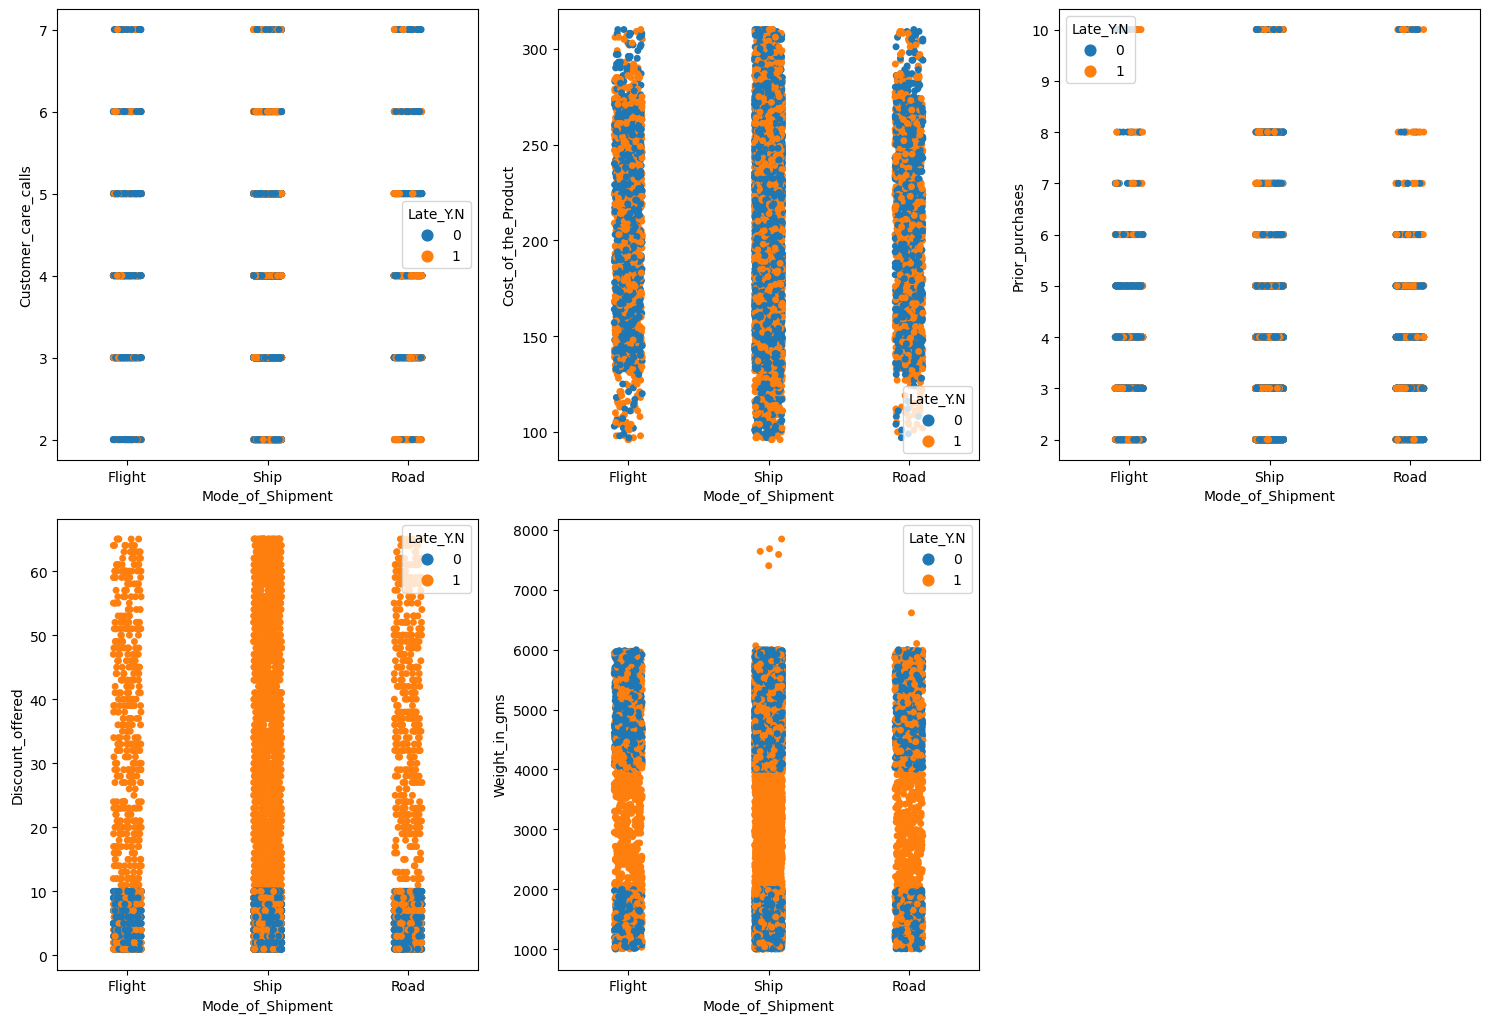

In [39]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Mode_of_Shipment', y=num[i], hue='Late_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

Insight : <mark> Setiap mode pengiriman mengalami keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg.

#### c) Product_importance

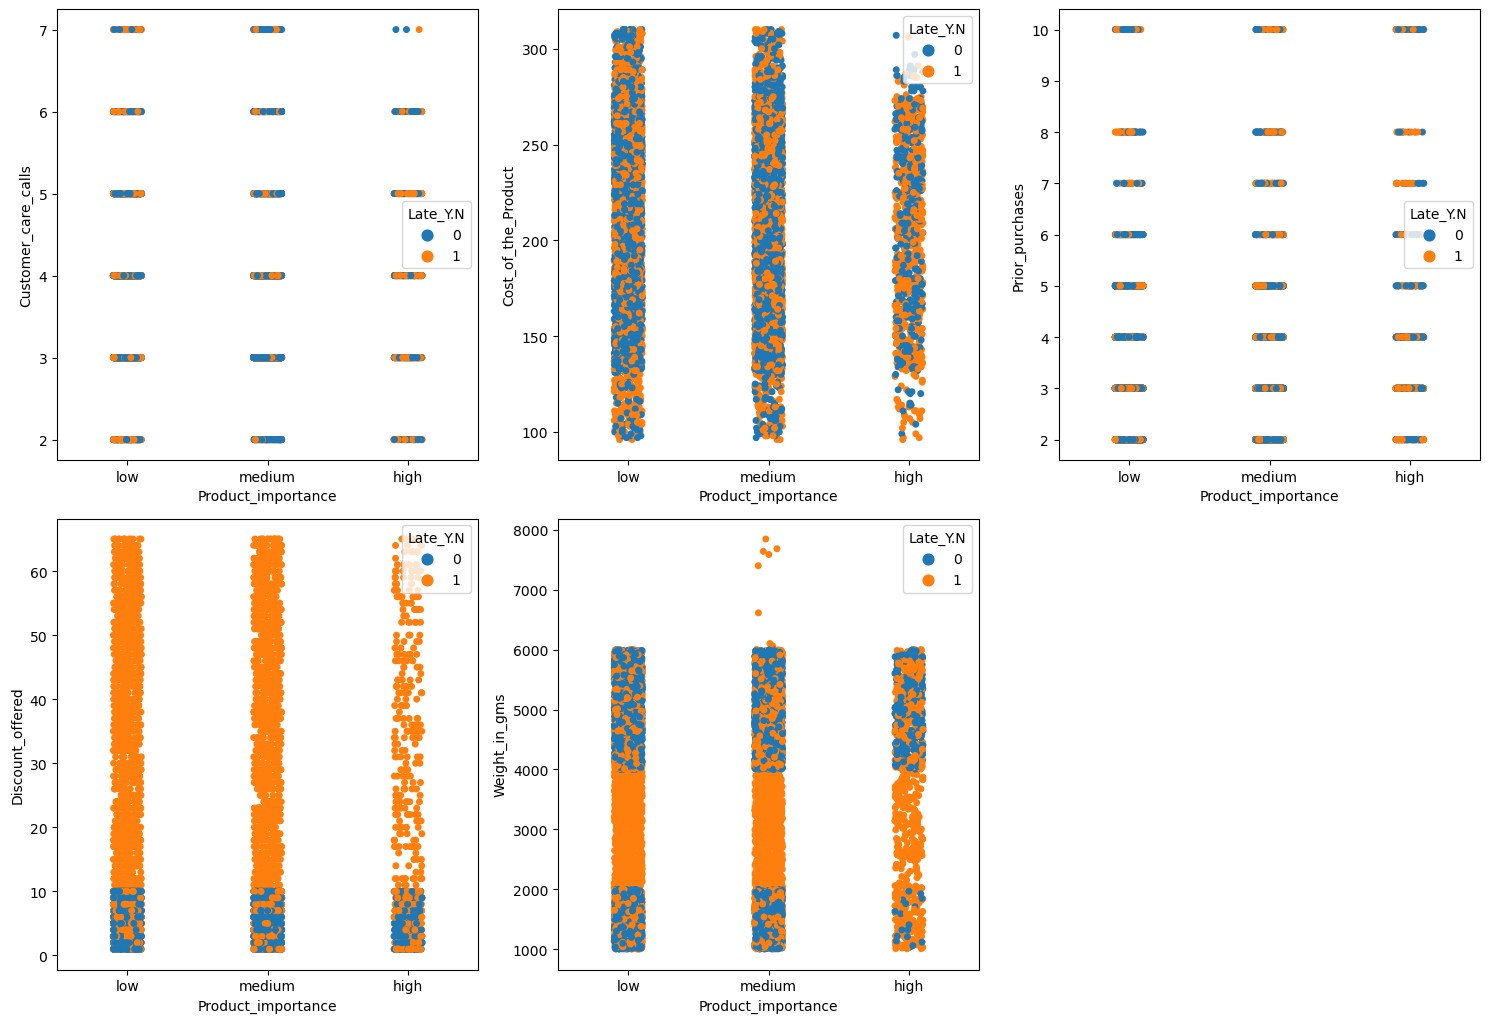

In [40]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Product_importance', y=num[i], hue='Late_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

Insight : <mark> Setiap produk_importance mengalami keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg.

#### d) Gender

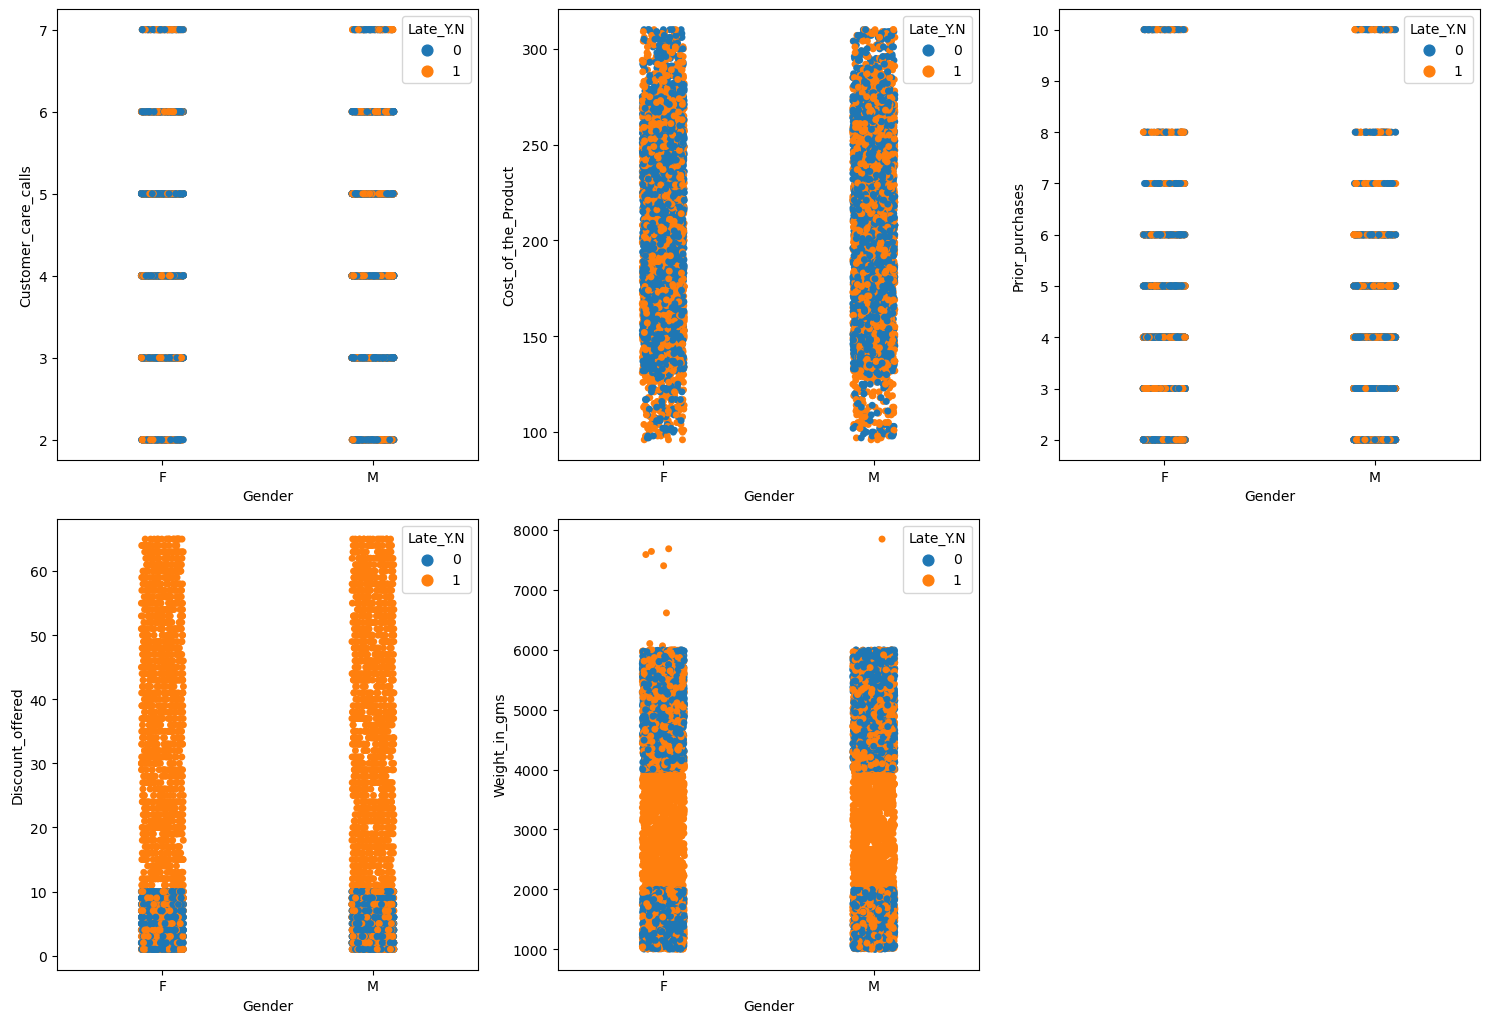

In [41]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=num[i], hue='Late_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

Insight : <mark> Keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg dialami oleh Wanita dan Pria.

# <B> 5. BUSINESS INSIGHT

## <i> A Insight

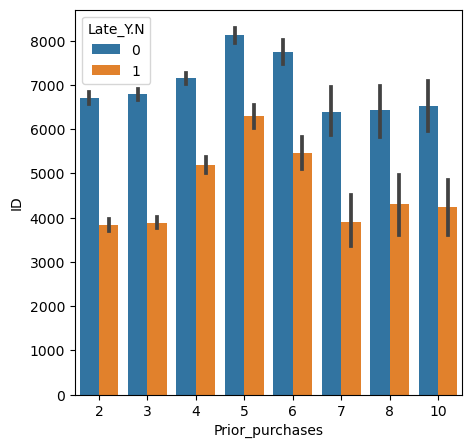

In [42]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df,x=df['Prior_purchases'],y=df['ID'],hue=df['Late_Y.N'])
plt.show()

<mark> Pelanggan awal membeli barang sampai 10x namun hasilnya tetap terlambat.

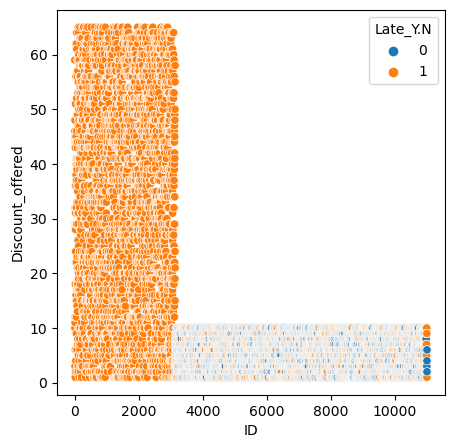

In [43]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x=df['ID'],y=df['Discount_offered'],hue=df['Late_Y.N'])
plt.show()

<mark> Pelanggan awal memiliki pemberian diskon diatas 10% hal ini menimbulkan spekulasi : </mark>
- Diskon yang diberikan adalah bentuk kompensasi karena mengalami keterlambatan.
- Loyalitas perusahaan kurang memperhatikan pelanggan awal.

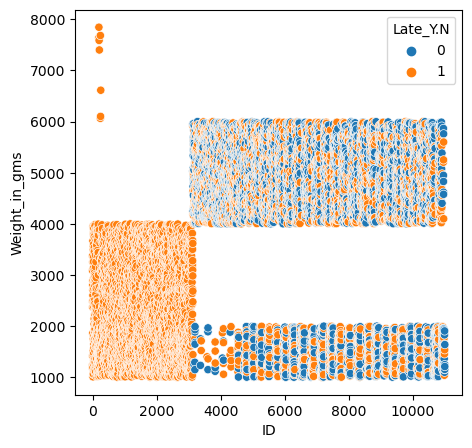

In [44]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x=df['ID'],y=df['Weight_in_gms'],hue=df['Late_Y.N'])
plt.show()

<mark> Berat barang 1-4 kg mengalami keterlambatan pada 3.000 pelanggan pertama.

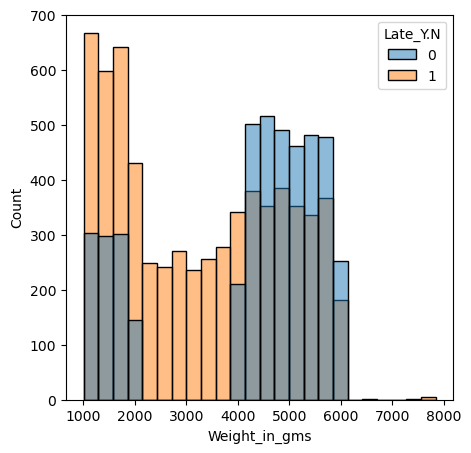

In [45]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df,x=df['Weight_in_gms'],hue=df['Late_Y.N'])
plt.show()

<mark> Seluruh barang dengan berat 2-4 kg **pasti** terlambat.

## <i> B. Kesimpulan EDA

- Pemberian diskon dilakukan sebagai bentuk kompensasi atas keterlambatan barang.
- Kebanyakan yang melakukan pembelian adalah perempuan dengan 30% diantaranya mengalami keterlambatan.
- ID 3.000 awal dan berat antara 2-4kg mengalami keterlambatan.

## <i> C. Rekomendasi Bisnis

- Pelacakan secara Real time agar dapat mengetahui keberadaan posisi pengiriman 
- Pemberian penambahan estimasi waktu yang diberikan
- Dilakukan Audit terhadap ID dan berat untuk 3.000 ID awal dan berat antara 2-4kg

# <B> 6. DATA CLEANSING

## <i> A. Handle Missing Values

Tidak dilakukan karena pada dataset **tidak ada nilai yang kosong**.

## <i> B. Handle Duplicated Data

Tidak dilakukan karena pada dataset **tidak ada nilai duplikat.**

## <i> C. Handle Outlier

Outlier **tidak di handle** karena akan fokus menggunakan model yang robust terhadap outlier.

## <i> D. Feature Transformation

### 1) Normalisasi

In [46]:
from sklearn.preprocessing import MinMaxScaler
df['Prior_purchases'] = MinMaxScaler().fit_transform(df['Prior_purchases'].values.reshape(len(df),1))

## <i> E. Feature Encoding

### 1) Label Encoding

In [47]:
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}


df['Gender'] = df['Gender'].map(mapping_Gender)
df['Product_importance'] = df['Product_importance'].map(mapping_Product_importance)

### 2) One Hot Encoding

In [48]:
# One hot encoder Warehouse_block & Mode_of_Shipment
# WARNING: run code ini sekali saja
for cat in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

## <i> F. Handle Class Imbalance

**Tidak perlu** handle class imbalance karena model tidak fokus pada class yg imbalance.

# <b> 7. FEATURE ENGINEERING

## <i> A. Feature Selection

In [49]:
# Menghapus data yang telah dilakukan Feature Encoding
df = df.drop(columns=['ID', 'Warehouse_block','Mode_of_Shipment', 'Discount_offered'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_care_calls      10999 non-null  int64  
 1   Customer_rating          10999 non-null  int32  
 2   Cost_of_the_Product      10999 non-null  int64  
 3   Prior_purchases          10999 non-null  float64
 4   Product_importance       10999 non-null  int64  
 5   Gender                   10999 non-null  int64  
 6   Weight_in_gms            10999 non-null  int64  
 7   Late_Y.N                 10999 non-null  int32  
 8   Warehouse_block_A        10999 non-null  uint8  
 9   Warehouse_block_B        10999 non-null  uint8  
 10  Warehouse_block_C        10999 non-null  uint8  
 11  Warehouse_block_D        10999 non-null  uint8  
 12  Warehouse_block_F        10999 non-null  uint8  
 13  Mode_of_Shipment_Flight  10999 non-null  uint8  
 14  Mode_of_Shipment_Road 

## <i> B. Feature Extraction

### 1) Import Library

In [50]:
import numpy as np

### 2) Category_loyalty

In [51]:
df['Category_loyalty'] = np.where(df['Prior_purchases'] < 4, 'Silver',
                                  np.where(df['Prior_purchases'] > 6, 'Platinum', 'Gold'))

### 3) Category_cost_of_the_product

In [52]:
df['Category_cost_of_the_product'] = np.where(df['Cost_of_the_Product'] < 170, 'Cheap',
                                              np.where(df['Cost_of_the_Product'] > 251, 'Expensive', 'Standard'))

In [53]:
df.sample(3)

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
10923                    5                5                  221   
18                       5                5                  239   
3619                     3                1                  210   

       Prior_purchases  Product_importance  Gender  Weight_in_gms  Late_Y.N  \
10923            0.375                   0       0           1220         0   
18               0.125                   2       1           2495         1   
3619             0.000                   0       1           4580         0   

       Warehouse_block_A  Warehouse_block_B  Warehouse_block_C  \
10923                  0                  1                  0   
18                     0                  0                  0   
3619                   0                  0                  0   

       Warehouse_block_D  Warehouse_block_F  Mode_of_Shipment_Flight  \
10923                  0                  0                        0   
18                     1                  0                        0   
3619                   0                  1                        0   

       Mode_of_Shipment_Road  Mode_of_Shipment_Ship Category_loyalty  \
10923                      0                      1           Silver   
18                         0                      1           Silver   
3619                       0                      1           Silver   

      Category_cost_of_the_product  
10923                     Standard  
18                        Standard  
3619                      Standard

# <B> 8. MODELING

## <i> A. Feature & Target

In [54]:
#Feature
X = df[['Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 
        'Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F']]

#Target
y = df['Late_Y.N']

## <i> B. Split Data Train & Data Test

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Data Train sebanyak :', X_train.shape)
print('Data Test sebanyak :', X_test.shape)

Data Train sebanyak : (7699, 11)
Data Test sebanyak : (3300, 11)


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
 
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))


    score = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('accuracy (crossval test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('Precision (crossval train): '+ str(score['train_score'].mean()))
    print('Precision (crossval test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (crossval test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)
    print('f1 (crossval train): '+ str(score['train_score'].mean()))
    print('f1 (crossval test): '+ str(score['test_score'].mean()))
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    for i in range (2,10,1):
        score = cross_validate(model, X, y, cv=i, scoring='accuracy', return_train_score=True)
        print('accuracy (crossval train): '+ str(score['train_score'].mean()))
        print('accuracy (crossval test): '+ str(score['test_score'].mean()))
        score = cross_validate(model, X, y, cv=i, scoring='precision', return_train_score=True)
        print('Precision (crossval train): '+ str(score['train_score'].mean()))
        print('Precision (crossval test): '+ str(score['test_score'].mean()))
        score = cross_validate(model, X, y, cv=i, scoring='recall', return_train_score=True)
        print('Recall (crossval train): '+ str(score['train_score'].mean()))
        print('Recall (crossval test): '+ str(score['test_score'].mean()))
        score = cross_validate(model, X, y, cv=i, scoring='f1', return_train_score=True)
        print('f1 (crossval train): '+ str(score['train_score'].mean()))
        print('f1 (crossval test): '+ str(score['test_score'].mean()))
        score = cross_validate(model, X, y, cv=i, scoring='roc_auc', return_train_score=True)
        print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
        print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
        print('.')

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## <i> C. Logistic Regression

### 1) Fit Model

Accuracy (Train Set): 0.64
Accuracy (Test Set): 0.65
Precision (Train Set): 0.65
Precision (Test Set): 0.67
Recall (Train Set): 0.82
Recall (Test Set): 0.83
F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.74
roc_auc (train-proba): 0.62
roc_auc (test-proba): 0.64
accuracy (crossval train): 0.6429214011922842
accuracy (crossval test): 0.5865920046302038
Precision (crossval train): 0.6702211988816877
Precision (crossval test): 0.6262691988070993
Recall (crossval train): 0.8093887023786852
Recall (crossval test): 0.7371021260193562
f1 (crossval train): 0.7305678721075999
f1 (crossval test): 0.6664782740598266
roc_auc (crossval train): 0.6622786850709084
roc_auc (crossval test): 0.6282787380432764


<AxesSubplot:>

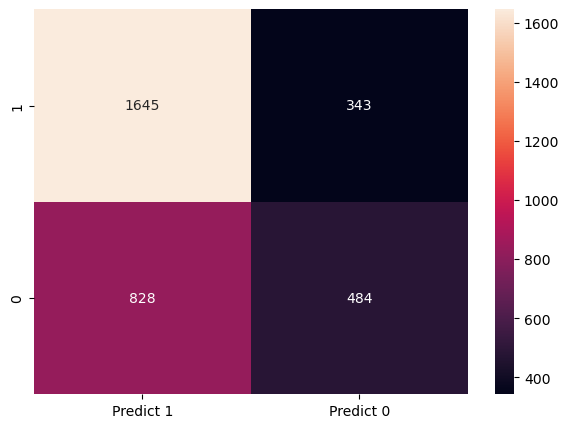

In [58]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
eval_classification(logreg)

y_pred = logreg.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],
                     columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

### 2) Evaluasi Data Train

<AxesSubplot:>

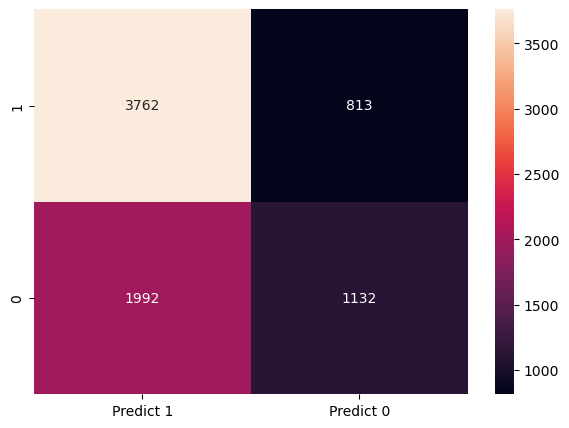

In [81]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

y_pred1 = logreg.predict(X_train)
cm=metrics.confusion_matrix(y_train,y_pred1,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],
                     columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

### 3) Hyperparameter Tuning 

In [78]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy (Train Set): 0.64
Accuracy (Test Set): 0.65
Precision (Train Set): 0.65
Precision (Test Set): 0.67
Recall (Train Set): 0.82
Recall (Test Set): 0.83
F1-Score (Train Set): 0.73
F1-Score (Test Set): 0.74
roc_auc (train-proba): 0.62
roc_auc (test-proba): 0.64


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

accuracy (crossval train): 0.6426941258820733
accuracy (crossval test): 0.5827734094009673


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Precision (crossval train): 0.6696743710408146
Precision (crossval test): 0.6228851579769528


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Recall (crossval train): 0.8115601236952598
Recall (crossval test): 0.7328330206378987


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

f1 (crossval train): 0.730924913390002
f1 (crossval test): 0.6623013813708025


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

roc_auc (crossval train): 0.6614676617585673
roc_auc (crossval test): 0.6296758562130897


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _

### 4) Learning Curve

param value: 0.01; train: 0.8222950819672131; test: 0.8274647887323944
param value: 1.12; train: 0.8222950819672131; test: 0.8274647887323944
param value: 2.23; train: 0.8222950819672131; test: 0.8274647887323944
param value: 3.34; train: 0.8222950819672131; test: 0.8274647887323944
param value: 4.45; train: 0.8222950819672131; test: 0.8274647887323944
param value: 5.5600000000000005; train: 0.8222950819672131; test: 0.8274647887323944
param value: 6.67; train: 0.8222950819672131; test: 0.8274647887323944
param value: 7.78; train: 0.8222950819672131; test: 0.8274647887323944
param value: 8.89; train: 0.8222950819672131; test: 0.8274647887323944
param value: 10.0; train: 0.8222950819672131; test: 0.8274647887323944


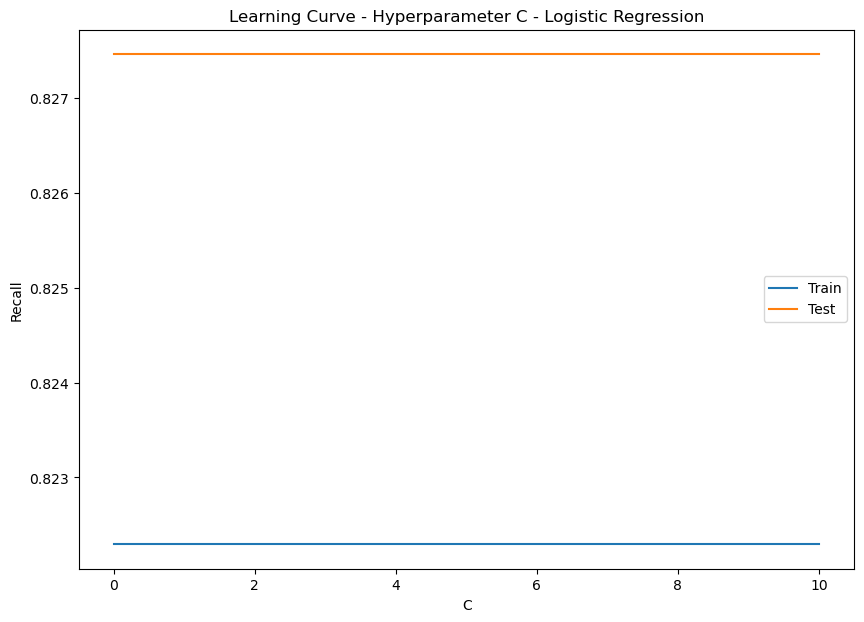

In [59]:
import numpy as np
param_values = [float(x) for x in np.linspace(0.01, 10, 10)]
draw_learning_curve(param_values)

## <i> D. K-Nearest Neighbor

### 1) Fit Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.65
Precision (Train Set): 0.83
Precision (Test Set): 0.72
Recall (Train Set): 0.79
Recall (Test Set): 0.68
F1-Score (Train Set): 0.81
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.87
roc_auc (test-proba): 0.73


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

accuracy (crossval train): 0.7813658111975534
accuracy (crossval test): 0.6233146058125594


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Precision (crossval train): 0.8349076712147335
Precision (crossval test): 0.6799533247738803


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Recall (crossval train): 0.7923966518849017
Recall (crossval test): 0.6325348763769434


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

f1 (crossval train): 0.8126248729597606
f1 (crossval test): 0.6268534727819741
roc_auc (crossval train): 0.8656707750192932
roc_auc (crossval test): 0.7234105217475788


### 2) Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Accuracy (Train Set): 0.70
Accuracy (Test Set): 0.67
Precision (Train Set): 0.81
Precision (Test Set): 0.79
Recall (Train Set): 0.65
Recall (Test Set): 0.62
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.69
roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.74


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

accuracy (crossval train): 0.7185414639060225
accuracy (crossval test): 0.6107659266608788


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Precision (crossval train): 0.8293220962652784
Precision (crossval test): 0.6900794530724902


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Recall (crossval train): 0.6825022426567275
Recall (crossval test): 0.548400028792748


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

f1 (crossval train): 0.744967092752455
f1 (crossval test): 0.5443139854672224
roc_auc (crossval train): 0.8034584814938807
roc_auc (crossval test): 0.7356109665551875


In [61]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = KNeighborsClassifier(n_neighbors=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train = model.predict(X_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred = model.predict(X_test)
        test_recall = recall_score(y_test, y_pred)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Recall')
    plt.title('Learning Curve - Hyperparameter C - KNN')
    plt.legend()
    plt.show()

C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 2; train: 0.700327868852459; test: 0.5709255533199196


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 6; train: 0.6791256830601093; test: 0.5950704225352113


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 10; train: 0.6625136612021858; test: 0.6091549295774648


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 14; train: 0.646120218579235; test: 0.6066398390342053


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 18; train: 0.6349726775956284; test: 0.6066398390342053


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 22; train: 0.6253551912568306; test: 0.5980885311871227


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 26; train: 0.6207650273224044; test: 0.5955734406438632


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 30; train: 0.6087431693989072; test: 0.5845070422535211


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 34; train: 0.5971584699453552; test: 0.5724346076458753


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 38; train: 0.593879781420765; test: 0.5689134808853119


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 42; train: 0.5886338797814208; test: 0.5719315895372233


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 46; train: 0.5812021857923497; test: 0.5699195171026157


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 50; train: 0.5801092896174863; test: 0.5744466800804829


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 54; train: 0.5739890710382514; test: 0.5653923541247485


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 58; train: 0.5709289617486338; test: 0.5704225352112676


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 62; train: 0.5652459016393443; test: 0.5653923541247485


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 66; train: 0.5656830601092896; test: 0.5658953722334004


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 70; train: 0.5639344262295082; test: 0.562374245472837


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 74; train: 0.5591256830601092; test: 0.5608651911468813


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 78; train: 0.5578142076502732; test: 0.567907444668008


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 82; train: 0.5547540983606557; test: 0.5658953722334004


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 86; train: 0.5562841530054645; test: 0.5633802816901409


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 90; train: 0.5569398907103825; test: 0.556841046277666


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 94; train: 0.553224043715847; test: 0.5583501006036218


C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\afrac\Anaconda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

param value: 98; train: 0.5516939890710383; test: 0.5538229376257545


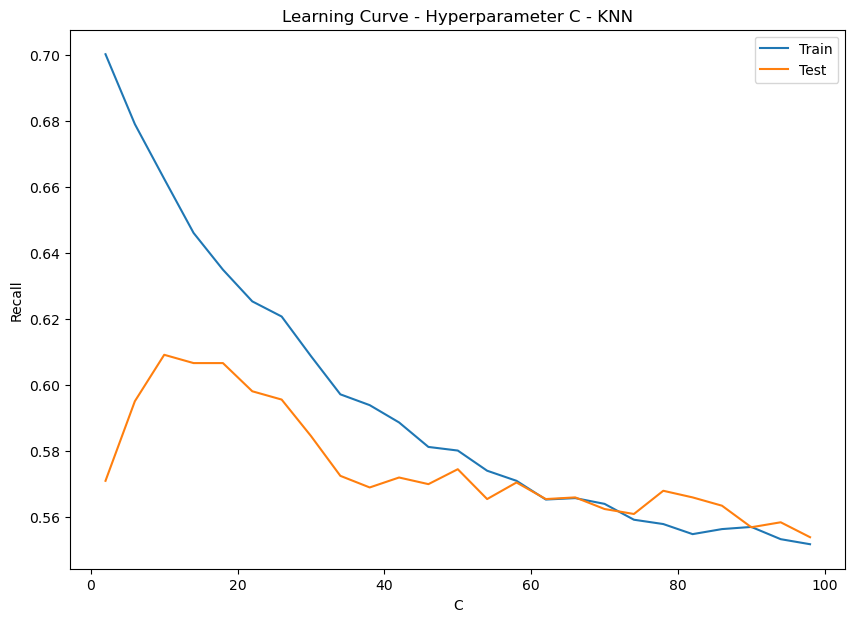

In [62]:
import numpy as np
param_values = [int(x) for x in range(2,100,4)]
draw_learning_curve(param_values)

## <i> E. Decision Tree

### 1) Fit Model

In [63]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.71
Recall (Train Set): 1.00
Recall (Test Set): 0.70
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.71
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.64
accuracy (crossval train): 0.999931813015942
accuracy (crossval test): 0.6314989044607053
Precision (crossval train): 1.0
Precision (crossval test): 0.680777717147546
Recall (crossval train): 0.9998857287954221
Recall (crossval test): 0.6768930070774432
f1 (crossval train): 0.9999428589563978
f1 (crossval test): 0.6625005253486886
roc_auc (crossval train): 0.9999999838994167
roc_auc (crossval test): 0.6206105794332808


### 2) Hyperparameter Tuning

param value: 2;Recall (Test Set): 0.70
param value: 3;Recall (Test Set): 0.69
param value: 4;Recall (Test Set): 0.69
param value: 6;Recall (Test Set): 0.69
param value: 7;Recall (Test Set): 0.69
param value: 9;Recall (Test Set): 0.70
param value: 10;Recall (Test Set): 0.70
param value: 12;Recall (Test Set): 0.69
param value: 13;Recall (Test Set): 0.70
param value: 15;Recall (Test Set): 0.70
param value: 16;Recall (Test Set): 0.70
param value: 18;Recall (Test Set): 0.70
param value: 19;Recall (Test Set): 0.70
param value: 21;Recall (Test Set): 0.71
param value: 22;Recall (Test Set): 0.71
param value: 24;Recall (Test Set): 0.71
param value: 25;Recall (Test Set): 0.71
param value: 27;Recall (Test Set): 0.72
param value: 28;Recall (Test Set): 0.71


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


param value: 30;Recall (Test Set): 0.70


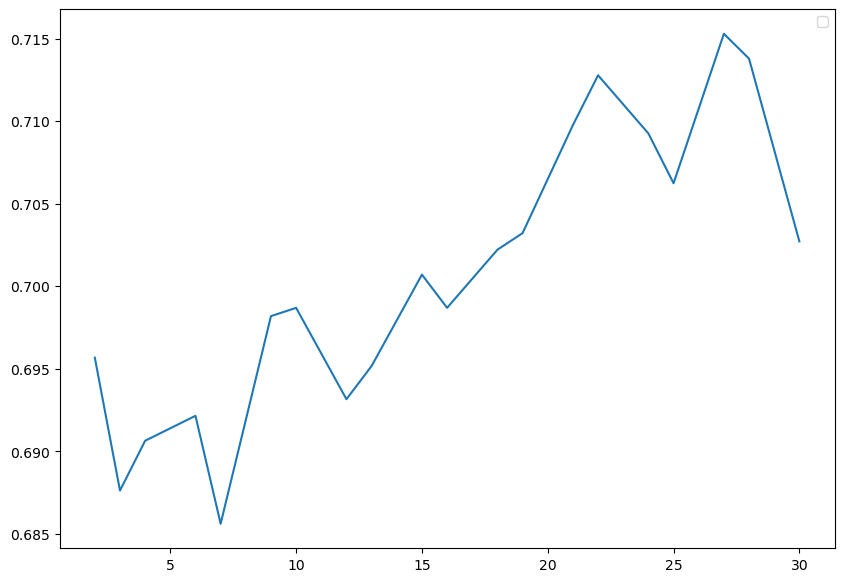

In [64]:
from sklearn.metrics import recall_score
#param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
param_values = [int(x) for x in np.linspace(2, 30, 20)] # min_samples_split
#param_values = [int(x) for x in np.linspace(1, 30, 15)] # min_samples_leaf

recall_scores = []


for c in param_values:
    model = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=c,max_depth=50,random_state=42)
    model.fit(X_train, y_train)

    # eval on recall
    y_pred = model.predict(X_test)
    recall_score1 = recall_score(y_test, y_pred)
    recall_scores.append(recall_score1)


    print('param value: ' + str(c) + ';Recall (Test Set): %.2f' % recall_score(y_test, y_pred))

plt.plot(param_values, recall_scores)

plt.legend()
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=27,max_depth=50,random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.81
Accuracy (Test Set): 0.67
Precision (Train Set): 0.85
Precision (Test Set): 0.73
Recall (Train Set): 0.82
Recall (Test Set): 0.72
F1-Score (Train Set): 0.84
F1-Score (Test Set): 0.72
roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.73
accuracy (crossval train): 0.8150053466819577
accuracy (crossval test): 0.6255872090619703
Precision (crossval train): 0.8558934814493947
Precision (crossval test): 0.6759007047383558
Recall (crossval train): 0.8298784920786064
Recall (crossval test): 0.652199510523285
f1 (crossval train): 0.8426643562896917
f1 (crossval test): 0.6436818917967108
roc_auc (crossval train): 0.9069389336942801
roc_auc (crossval test): 0.7117393545020939


## <i> F. Random Forest

### 1) Fit Model

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.65
Precision (Train Set): 1.00
Precision (Test Set): 0.72
Recall (Train Set): 1.00
Recall (Test Set): 0.69
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.70
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.73
accuracy (crossval train): 0.999931813015942
accuracy (crossval test): 0.627497994956385
Precision (crossval train): 0.9999238312856086
Precision (crossval test): 0.6838719313058113
Recall (crossval train): 0.9999619120167587
Recall (crossval test): 0.6421366773168873
f1 (crossval train): 0.999942866211252
f1 (crossval test): 0.6353478419519705
roc_auc (crossval train): 0.9999999838994167
roc_auc (crossval test): 0.7332719422190881


### 2) Hyperparameter Tuning

param value: 50;Recall (Test Set): 0.82
param value: 51;Recall (Test Set): 0.82
param value: 52;Recall (Test Set): 0.82
param value: 53;Recall (Test Set): 0.82
param value: 54;Recall (Test Set): 0.82
param value: 55;Recall (Test Set): 0.82
param value: 56;Recall (Test Set): 0.82
param value: 57;Recall (Test Set): 0.82
param value: 58;Recall (Test Set): 0.82
param value: 59;Recall (Test Set): 0.82
param value: 60;Recall (Test Set): 0.82
param value: 61;Recall (Test Set): 0.82
param value: 62;Recall (Test Set): 0.82
param value: 63;Recall (Test Set): 0.82
param value: 64;Recall (Test Set): 0.82
param value: 65;Recall (Test Set): 0.82
param value: 66;Recall (Test Set): 0.83
param value: 67;Recall (Test Set): 0.83
param value: 68;Recall (Test Set): 0.82
param value: 69;Recall (Test Set): 0.82
param value: 70;Recall (Test Set): 0.82
param value: 71;Recall (Test Set): 0.82
param value: 72;Recall (Test Set): 0.82
param value: 73;Recall (Test Set): 0.83
param value: 74;Recall (Test Set): 0.83


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


param value: 100;Recall (Test Set): 0.82


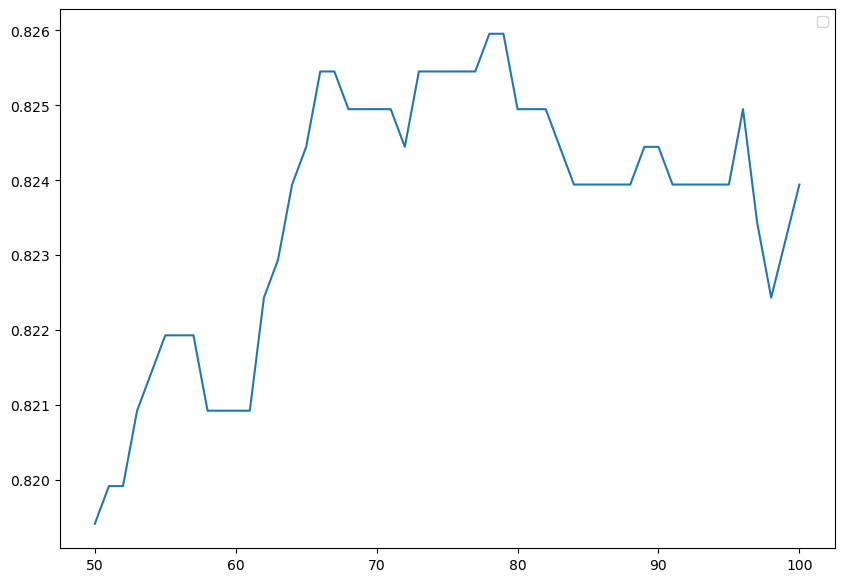

In [67]:
from sklearn.metrics import recall_score
#param_values = [int(x) for x in np.linspace(50, 100, 50)] # n_estimators
#param_values = [int(x) for x in np.linspace(2, 10, 9)] # max_depth
param_values = [int(x) for x in np.linspace(50, 100, 50)] # min_samples_leaf

recall_scores = []


for c in param_values:
    model = RandomForestClassifier(n_estimators=95, min_samples_leaf=c,max_depth=3,random_state=42)
    model.fit(X_train, y_train)

    # eval on recall
    y_pred = model.predict(X_test)
    recall_score1 = recall_score(y_test, y_pred)
    recall_scores.append(recall_score1)


    print('param value: ' + str(c) + ';Recall (Test Set): %.2f' % recall_score(y_test, y_pred))

plt.plot(param_values, recall_scores)

plt.legend()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=95, min_samples_leaf=77,max_depth=3,random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.64
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.65
Recall (Train Set): 0.84
Recall (Test Set): 0.83
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.73
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
accuracy (crossval train): 0.6698096762028742
accuracy (crossval test): 0.5348605977923849
Precision (crossval train): 0.7288508708450653
Precision (crossval test): 0.6140435572176043
Recall (crossval train): 0.806385729702279
Recall (crossval test): 0.6156333011349915
f1 (crossval train): 0.7439928259675626
f1 (crossval test): 0.5728459539079409
roc_auc (crossval train): 0.7532702805778163
roc_auc (crossval test): 0.7189510307839336


Accuracy (Train Set): 0.64
Accuracy (Test Set): 0.63
Precision (Train Set): 0.66
Precision (Test Set): 0.65
Recall (Train Set): 0.84
Recall (Test Set): 0.83
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.73
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
accuracy (crossval train): 0.6698096762028742
accuracy (crossval test): 0.5348605977923849
Precision (crossval train): 0.7288508708450653
Precision (crossval test): 0.6140435572176043
Recall (crossval train): 0.806385729702279
Recall (crossval test): 0.6156333011349915
f1 (crossval train): 0.7439928259675626
f1 (crossval test): 0.5728459539079409
roc_auc (crossval train): 0.7532702805778163
roc_auc (crossval test): 0.7189510307839336


<AxesSubplot:>

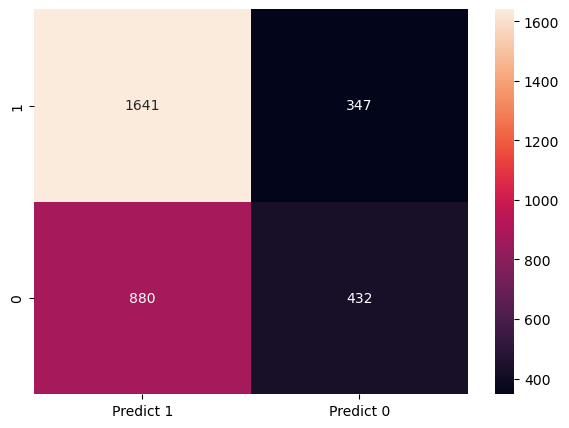

In [69]:
rf = RandomForestClassifier(n_estimators=95, min_samples_leaf=77,max_depth=3,random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],
                     columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

Accuracy (Train Set): 0.60
Accuracy (Test Set): 0.61
Precision (Train Set): 0.60
Precision (Test Set): 0.61
Recall (Train Set): 0.97
Recall (Test Set): 0.98
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.75
roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.73
accuracy (crossval train): 0.6392617549514925
accuracy (crossval test): 0.5514087808508
Precision (crossval train): 0.6507841613520604
Precision (crossval test): 0.5937296456411045
Recall (crossval train): 0.893844089561172
Recall (crossval test): 0.773658699125072
f1 (crossval train): 0.7473619216999164
f1 (crossval test): 0.6603604738698576
roc_auc (crossval train): 0.7429204320340028
roc_auc (crossval test): 0.7122223873842666


<AxesSubplot:>

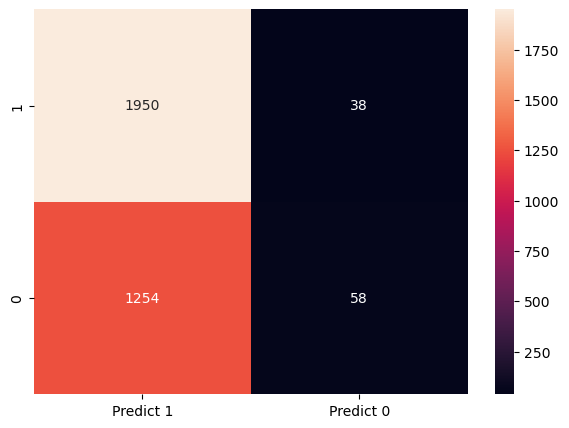

In [70]:
rf = RandomForestClassifier(n_estimators=95, min_samples_leaf=77,max_depth=2,random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

y_pred = rf.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],
                     columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## <i> G. Adaboost

### 1) Fit Model

In [71]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Train Set): 0.65
Accuracy (Test Set): 0.64
Precision (Train Set): 0.69
Precision (Test Set): 0.70
Recall (Train Set): 0.74
Recall (Test Set): 0.73
F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.71
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.74
accuracy (crossval train): 0.6649457815454236
accuracy (crossval test): 0.6107698127247922
Precision (crossval train): 0.7186046192865414
Precision (crossval test): 0.6554610072790524
Recall (crossval train): 0.7302293875996408
Recall (crossval test): 0.6625688471755244
f1 (crossval train): 0.7233892304617706
f1 (crossval test): 0.6419695495917725
roc_auc (crossval train): 0.750356603675747
roc_auc (crossval test): 0.7179503346598447


### 2) Hyperparameter Tuning

param value: 10;Recall (Test Set): 0.89
param value: 11;Recall (Test Set): 0.61
param value: 12;Recall (Test Set): 0.71
param value: 13;Recall (Test Set): 0.62
param value: 14;Recall (Test Set): 0.89
param value: 15;Recall (Test Set): 0.62
param value: 16;Recall (Test Set): 0.78
param value: 17;Recall (Test Set): 0.62
param value: 18;Recall (Test Set): 0.65


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


param value: 20;Recall (Test Set): 0.80


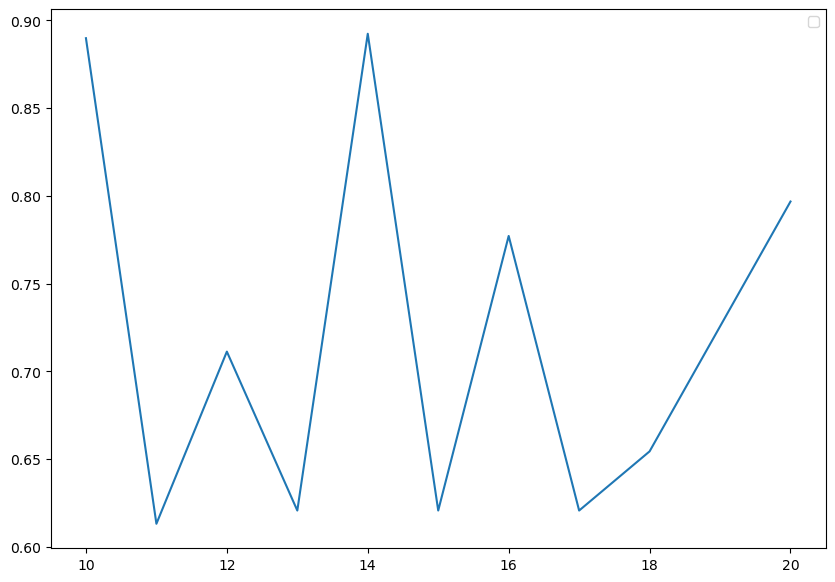

In [72]:
from sklearn.metrics import recall_score
param_values = [int(x) for x in np.linspace(10, 20, 10)] # n_estimators
#param_values = [float(x) for x in np.linspace(1.9, 1.92, 100)] # learning_rate

recall_scores = []

for c in param_values:
    model = AdaBoostClassifier(n_estimators=c,learning_rate=1.91,random_state=42)
    model.fit(X_train, y_train)

    # eval on recall
    y_pred = model.predict(X_test)
    recall_score1 = recall_score(y_test, y_pred)
    recall_scores.append(recall_score1)

    print('param value: ' + str(c) + ';Recall (Test Set): %.2f' % recall_score(y_test, y_pred))

plt.plot(param_values, recall_scores)

plt.legend()
plt.show()

Accuracy (Train Set): 0.63
Accuracy (Test Set): 0.62
Precision (Train Set): 0.63
Precision (Test Set): 0.63
Recall (Train Set): 0.89
Recall (Test Set): 0.89
F1-Score (Train Set): 0.74
F1-Score (Test Set): 0.74
roc_auc (train-proba): 0.74
roc_auc (test-proba): 0.74
accuracy (crossval train): 0.6485812773145708
accuracy (crossval test): 0.5574103931539129
Precision (crossval train): 0.6875700880976221
Precision (crossval test): 0.6199083285191869
Recall (crossval train): 0.7888522422032991
Recall (crossval test): 0.6947704010551149
f1 (crossval train): 0.7283642598043648
f1 (crossval test): 0.6374095382168565
roc_auc (crossval train): 0.7174113072450694
roc_auc (crossval test): 0.6198851076273106


<AxesSubplot:>

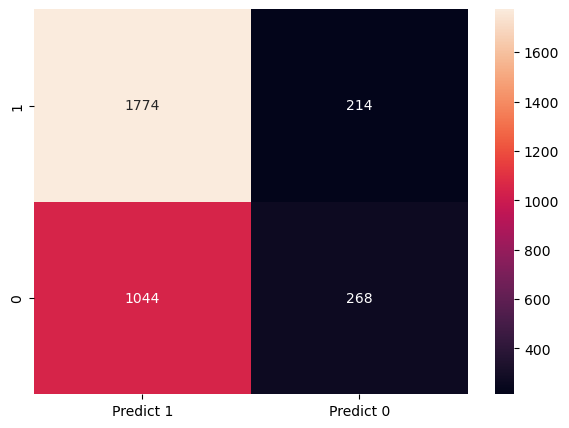

In [73]:
clf = AdaBoostClassifier(n_estimators=14,learning_rate=1.91,random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

y_pred = clf.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],
                     columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## <I> H. XGBoost

### 1) Fit Model

In [74]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.66
Precision (Train Set): 0.94
Precision (Test Set): 0.75
Recall (Train Set): 0.84
Recall (Test Set): 0.66
F1-Score (Train Set): 0.89
F1-Score (Test Set): 0.70
roc_auc (train-proba): 0.96
roc_auc (test-proba): 0.75
accuracy (crossval train): 0.8690787227887465
accuracy (crossval test): 0.6114948943734755
Precision (crossval train): 0.9297500873781104
Precision (crossval test): 0.675077218293703
Recall (crossval train): 0.8470993534111416
Recall (crossval test): 0.5924484052532832
f1 (crossval train): 0.885440503360193
f1 (crossval test): 0.5877524107993941
roc_auc (crossval train): 0.9532046151476987
roc_auc (crossval test): 0.7320063768122842


### 2) Hyperparameter Tuning

param value: 0.9;Recall (Test Set): 0.74
param value: 0.901;Recall (Test Set): 0.74
param value: 0.902;Recall (Test Set): 0.74
param value: 0.903;Recall (Test Set): 0.74
param value: 0.904;Recall (Test Set): 0.74
param value: 0.905;Recall (Test Set): 0.75
param value: 0.906;Recall (Test Set): 0.74
param value: 0.907;Recall (Test Set): 0.75
param value: 0.908;Recall (Test Set): 0.75
param value: 0.909;Recall (Test Set): 0.74
param value: 0.91;Recall (Test Set): 0.74
param value: 0.911;Recall (Test Set): 0.74
param value: 0.912;Recall (Test Set): 0.74
param value: 0.913;Recall (Test Set): 0.74
param value: 0.914;Recall (Test Set): 0.74
param value: 0.915;Recall (Test Set): 0.74
param value: 0.916;Recall (Test Set): 0.74
param value: 0.917;Recall (Test Set): 0.74
param value: 0.918;Recall (Test Set): 0.74
param value: 0.919;Recall (Test Set): 0.74
param value: 0.92;Recall (Test Set): 0.74
param value: 0.921;Recall (Test Set): 0.74
param value: 0.922;Recall (Test Set): 0.74
param value: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


param value: 1.0;Recall (Test Set): 0.69


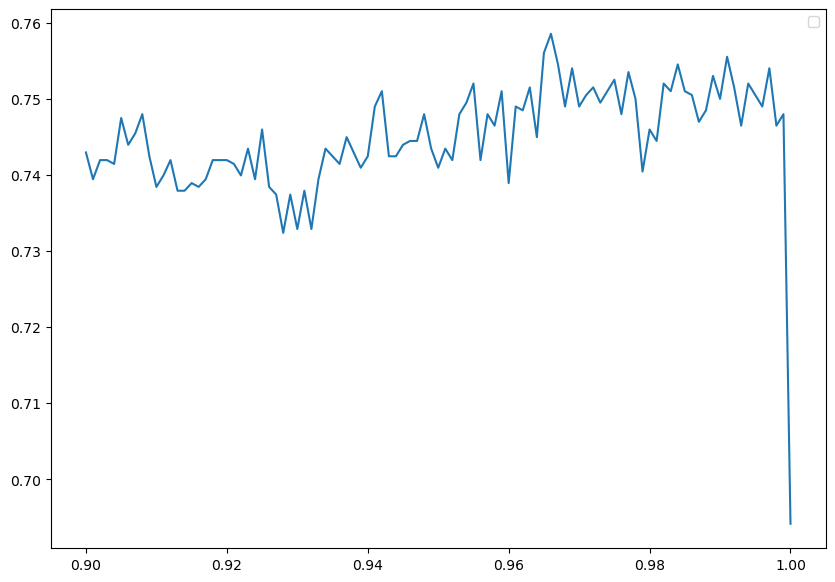

In [75]:
from sklearn.metrics import recall_score
#param_values = [int(x) for x in np.linspace(1, 100, 40)] # max_depth
param_values = [float(x) for x in np.linspace(0.9,1, 101)] # subsample
#param_values = [float(x) for x in np.linspace(0,1, 10)] # colsample_bytree
#param_values = [float(x) for x in np.linspace(0,1, 10)] # colsample_bylevel

recall_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=5,subsample=c,colsample_bytree=0.1)
    model.fit(X_train, y_train)

    # eval on recall
    y_pred = model.predict(X_test)
    recall_score1 = recall_score(y_test, y_pred)
    recall_scores.append(recall_score1)

    print('param value: ' + str(c) + ';Recall (Test Set): %.2f' % recall_score(y_test, y_pred))

plt.plot(param_values, recall_scores)

plt.legend()
plt.show()

Accuracy (Train Set): 0.61
Accuracy (Test Set): 0.61
Precision (Train Set): 0.63
Precision (Test Set): 0.63
Recall (Train Set): 0.86
Recall (Test Set): 0.86
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.73
roc_auc (train-proba): 0.67
roc_auc (test-proba): 0.66
accuracy (crossval train): 0.6432846346175701
accuracy (crossval test): 0.6007699367481087
Precision (crossval train): 0.673817848933202
Precision (crossval test): 0.6342049211897132
Recall (crossval train): 0.8019237696221128
Recall (crossval test): 0.7349384903312095
f1 (crossval train): 0.7289161455125631
f1 (crossval test): 0.6646297585641814
roc_auc (crossval train): 0.7090597638098851
roc_auc (crossval test): 0.6812164354524578


<AxesSubplot:>

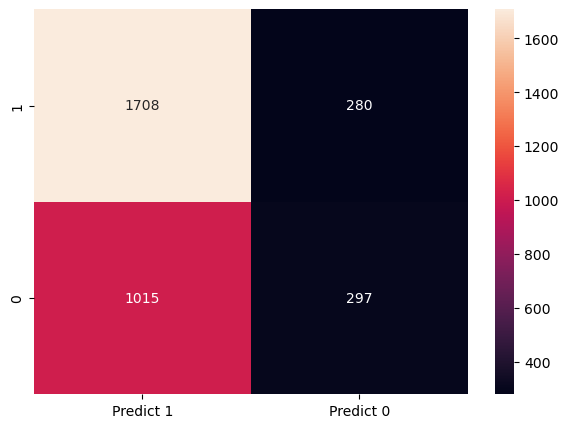

In [76]:
xg = XGBClassifier(max_depth=5,subsample=0.002,colsample_bytree=0.1)
xg.fit(X_train, y_train)
eval_classification(xg)

y_pred = xg.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],
                     columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')